# Comparison of the Power emitted by the body, based on temperature from the thermocouple and the Power received by the thermal camera

## 0. Imports

In [117]:
import numpy as np
import sympy as smp
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from IPython.display import display, Latex
#import mplcursors
#import mpldatacursor

## 1. Numerical Integration Functions

### 1.1. The Trapezoidal Integration Method
We want to define a function that performs the approximation using the Trapezoidal rule
$$\displaystyle \int_{x_0}^{x_N} f (x) d x \approx \frac{\Delta x}{2} \Big( f (x_0) + 2 f (x_1) + 2 f (x_2) + \dots + 2 f (x_{N-1}) + f (x_N) \Big)$$
where 
$$x_k = x_{k-1} + \frac{x_N - x_0}{N}$$
and 
$$\Delta x = \frac{x_N - x_0}{N}$$

In [118]:
##################################
# Define the Trapezoidal integraion
##################################
# Copied from stack overflow but fairly simple

def trapezoidal(f, x_0, x_N, N):
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += f(x_0)/2.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        x_k = x_0 + i * delta_x
        sum += f(x_k)

    # For x_N
    sum += f(x_N)/2.0
    
    sum = sum * delta_x
    
    return sum

### 1.1.1 Tests for the trapezoidal function.
We check the following integrals
$$\displaystyle \int_{1}^{2} e^x d x = e^2 - e^1 \approx 4.67077$$
$$\displaystyle \int_{2}^{3} x e^x d x = 2 e^3 - e^2 \approx 32.78202$$
$$\displaystyle \int_{2}^{3} x^3 d x = \frac{3^4 - 2^4}{4} = 16.25 $$

In [119]:
N = 1000

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = trapezoidal(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = trapezoidal(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = trapezoidal(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774659702784
Integral 2 = 32.782022595359464
Integral 3 = 16.250001250000008


### 1.2. The Simpson 1/3 Integration Method
We want to define a function that performs the approximation using Simpson's 1/3 rule
$$\displaystyle \int_{x_0}^{x_N} f (x) d x \approx \frac{\Delta x}{3} \Big( f (x_0) + 4 f (x_1) + 2 f (x_2) + 4 f (x_3) + 2 f (x_4) + \dots + 4 f (x_{N-3})+ 2 f (x_{N-2}) + 4 f (x_{N-1}) + f (x_N) \Big)$$
where 
$x_k$ and $\Delta x$ are the same as that in Trapezoidal rule (Section 1.1) and $N \: \textbf{is even!}$

In [120]:
##################################
# Define the Simpson's 1/3 integraion
##################################
# Modified from trapezoidal

def Simpson_13(f, x_0, x_N, N):

    if N % 2 != 0:
        raise Exception('N (the number of intervals) needs to be divisible by 2 (even)')
        
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += f(x_0)/3.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        if i%2 == 1: 
            sum += 4/3.0 * f(x_0 + i * delta_x)
        else:
            sum += 2/3.0 * f(x_0 + i * delta_x)

    # For x_N
    sum += f(x_N)/3.0

    sum = sum * delta_x
    
    return sum

### 1.2.1 Tests for Simpson's 1/3 rule.
We do the calculations for the same expressions as that for the Trapezoidal rule (Section 1.1, 1.1.1)

In [121]:
#######################################
#### Remember N needs to be even ##############
######################################
N = 1000

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = Simpson_13(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = Simpson_13(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = Simpson_13(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774270471628
Integral 2 = 32.78201774744518
Integral 3 = 16.250000000000014


### 1.3. The Simpson 3/8 Integration Method
We want to define a function that performs the approximation using Simpson's 3/8 rule
$$\displaystyle \int_{x_0}^{x_1} f (x) d x \approx \frac{3 \Delta x}{8} \Big( f (x_0) + 3 f (x_1) + 3 f (x_2) + 2 f (x_3) + 3 f (x_4) + 3 f (x_5) + 2 f (x_6) + \dots + 3 f (x_{N-5}) + 3 f (x_{N-4}) + 2 f (x_{N-3}) + 3 f (x_{N-2})+ 3 f (x_{N-1}) + f (x_N) \Big)$$
where 
$x_k$ and $\Delta x$ are the same as that in Trapezoidal rule (Section 1.1) and $N \: \textbf{is divisible by 3!}$

In [122]:
##################################
# Define the Simpson's 1/3 integraion
##################################
# Modified from trapezoidal

def Simpson_38(f, x_0, x_N, N):

    if N % 3 != 0:
        raise Exception('N (the number of intervals) needs to be divisible by 3')
        
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += 3 * f(x_0)/8.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        if i%3 != 0: 
            sum += 3 * 3 * f(x_0 + i * delta_x) / 8.0
        else:
            sum += 3 * 2 * f(x_0 + i * delta_x) / 8.0

    # For x_N
    sum += 3 * f(x_N)/8.0

    sum = sum * delta_x
    
    return sum

### 1.3.1 Tests for Simpson's 3/8 rule.
We do the calculations for the same expressions as that for the Trapezoidal rule (Section 1.1, 1.1.1)

In [123]:
#######################################
#### Remember N needs to be divisible by 3 ##############
######################################
N = 9999

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = Simpson_38(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = Simpson_38(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = Simpson_38(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774270471601
Integral 2 = 32.782017747444755
Integral 3 = 16.24999999999996


## 2. Numerical integration for Blackbody

### 2.1 Expression for Planck's Law
I was confused by $2 \pi$ and factors of $c$'s and the various quantities discussed in representation of the Planck distribution. To avoid confusion, now I am following the notaion and expressions used in:

$\textbf{6. Electromagnetic raditaion. AST1100 – Introduction to astrophysics, Lecture Notes. University of Oslo}$

$$\displaystyle B(\nu, T) = \frac{2 h \nu^3}{c^2} \frac{1}{\displaystyle \mathrm{exp} \: \left(\frac{h \nu}{k_B T}\right) - 1}$$

The quantity $B(\nu, T)$, $\textbf{The Spectral Intensity}$ is defined such that,
$$\Delta E = B(\nu) \mathrm{cos} \theta \Delta \nu \Delta A \Delta \Omega \Delta t$$

is the small energy passing through a small area $\Delta A$ into a small solid
angle $\Delta \Omega$ per small time interval $\Delta t$ in the small frequency range $\left[\nu, \nu + \Delta \nu \right]$. Intensity is measured in units of W m$^{-2}$ sr$^{-1}$ Hz$^{-1}$

Some other quantities are often defined.
1. Flux (or total Flux)

$$F = \frac{d E}{d A \: d t}$$
is the total energy received per area per time.

2. Flux per frequency

$$F (\nu) = \frac{d E}{d A \: d t \: d \nu}$$
is the flux at a certain frequency.

3. Luminosity
$$F = \frac{d E}{d t}$$
is the energy received per time; i.e. the power, which should be the quantity most useful to us.

4. Luminosity per frequency
$$F = \frac{d E}{d t \: d \nu}$$
is the luminosity at a certain frequency.

The quantity $B(\lambda, T)$, The Spectral Intensity as a function of the wavelength is obtained from $B(\nu, T)$, and is given by
$$\displaystyle B(\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{\displaystyle \mathrm{exp} \: \left(\frac{h c}{\lambda k_B T}\right) - 1}$$ 
the units for which is given by  W m$^{-2}$ sr$^{-1}$ m$^{-1}$
$$\Delta E = B(\lambda) \mathrm{cos} \theta \Delta \lambda \Delta A \Delta \Omega \Delta t$$

### 2.2 Defining the Constants
Let's take the following values.
$$h = 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1}$$
taken from the Wikipedia article on: Planck Constant 
$$c = 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} $$
taken from the  Wikipedia article on: Speed of Light
$$k_B = 1.380649 \times 10^{-23} \: \mathrm{J \: K}^{-1}$$
taken from the Wikipedia article on: Boltzmann constant 

Two radiation constants are defined to make the simplifications. It seems that the constants are defined to make simplifications in the wavelength parametrization. Let's index them with lambda subscript.

The first radiation constant
$$c_{1\lambda} = 2 h c^2 = 2 \times 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} \times  \left( 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} \right)^2 = 1.1910429723971884 \times 10^{-16} \: \mathrm{J \: s}^{-1} \: \mathrm{m}^2$$

The second radiation constant
$$c_{2\lambda} = \frac{h c}{k_B} = \frac{6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} \times 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1}}{1.380649 \times 10{-23} \: \mathrm{J \: K}^{-1}} = 1.4387768775039337 \times 10^{-2} \: \mathrm{m \: K}$$

Likewise we can define two constants for the frequency parametrization, and use a nu subscript.

The first radiation constant
$$c_{1\nu} = \frac{2 h}{c^2} = \frac{2 \times 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} }{\left( 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} \right)^2 }= 1.4744994647625417 \times 10^{-50} \: \mathrm{J \: m}^{-2} \: \mathrm{s}^3$$

The second radiation constant
$$c_{2\nu} = \frac{h}{k_B} = \frac{6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} }{1.380649 \times 10{-23} \: \mathrm{J \: K}^{-1}} =  4.799243073366221 \times 10^{-11} \: \mathrm{K \: s}^{-1}$$

In [124]:
#########################
# 1. Planck Constant ###
#########################
h = 6.62607015 * (10**(-34))

##########################
# 2. Speed of Light ####
##########################
c = 2.99792458 * (10**(8))

##########################
# 3. Boltzmann constant
#########################
k_B = 1.380649 * (10**(-23))

###########################
# 4. First radiation constant in wavelength(lambda) parametrization
###########################
c_1_lambda = 2 * h * c**2

###########################
# 5. Second radiation constant in wavelength(lambda) parametrization
###########################
c_2_lambda =  h * c / k_B

###########################
# 6. First radiation constant in frequency(nu) parametrization
###########################
c_1_nu = 2 * h / (c**2)

###########################
# 7. Second radiation constant in frequency(nu) parametrization
###########################
c_2_nu =  h / k_B

### 2.3 Integration using symbolic substitution
In this section, we will try to use symbolic substitution to do the integration. We find out soon that it takes too long and we will not use it. However, if we could, symbolic substitution would make handling of expressions, especially when we have multiple emissivity models, much simpler.

In [125]:
# Define symbolic variables
T_couple = smp.Symbol('T_couple')
lambda_ = smp.Symbol('lambda_')

In [126]:
# Define the expression for Intensity given by Planck's law
B_lambda_T = (c_1_lambda / (lambda_ **5 )) * (1/( smp.exp(c_2_lambda/ (lambda_ * T_couple)) - 1) )

In [127]:
# Let's see what the expression looks like
B_lambda_T

1.19104297239719e-16/(lambda_**5*(exp(0.0143877687750393/(T_couple*lambda_)) - 1))

#### 2.3.1 Read Dummy Data
For now, we will read the dummy data file, GlobalTemperaturesRefined.csv which has 1 column of data consisting of the first column from the dataset https://github.com/sn2606/Global-Temperature-Time-Series/blob/master/GlobalTemperatures.csv , after the NaN values are droppped off.

##### Later we will define function to handle the data and integrate it into a pipeline. 

In [128]:
# Read the data from a csv file
T_couple_s = np.genfromtxt('GlobalTemperaturesRefined.csv', delimiter=',')

In [129]:
# Let's see what the data looks like
T_couple_s

array([ 3.034,  3.083,  5.626, ..., 10.801,  7.433,  5.518])

Let's assume that the data from one thermocouple will be this way. The data from multiple thermocouples could be separated into this format.

#### 2.3.2 Plug in the temperatures in the expression for the Intensity
We will now plug in the temperature data that we read from the file, into the expression for the Intensity. 
This will leave us with an expression in the wavelength, $\lambda$.
Since, we will do this for a list of temperatures, we will get a list of expressions for Intensity.

In [130]:
# Create and empty list that will hold a list of expressions for Intensity with the temperatures plugged in. 
# Wavelength is yet to be plugged in. The symbolic variable: lambda_ , represents the wavelength
# The temperatures that we read from the file, above
B_lambda_T_s = []
# For each temperature
for i in range(np.size(T_couple_s)):
    # subtitute the value of the temperature in the expression for Intensity
    B_lambda_T_s.append(B_lambda_T.subs(T_couple, T_couple_s[i]))

In [131]:
# Let's see what the list of expressions looks like. 
B_lambda_T_s

[1.19104297239719e-16/(lambda_**5*(exp(0.00474217823831224/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0046668079062729/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00255737091628854/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00169467241166541/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00124321859284882/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00111214105086491/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00090671595506928/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.000975441950850125/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0012606473998983/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00225974065887221/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00519039277598822/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00576664079159893/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0149405698598539/lambda_) - 1)),
 1.19104297239719e-16/(lamb

In [132]:
# Let's also check the length of the list
np.size(B_lambda_T_s)

3180

#### 2.3.3 Integrate over the wavelengths
We will now integrate the expressions with respect to the wavelength, from some $\lambda_0$ to $\lambda_1$.
[$\lambda_0, \lambda_1$] is the bandwidth or sensitivity range of our thermal camera. 

1. $\textbf{Note: If the thermal camera has a non-trivial Responsivity}$,
i.e. power at various wavelengths is not detected in the same proportion, we will need to weight the expressions above with the responsivity curve of the thermal camera, $R(\lambda)$

2. The integration will produce values of integrated intensity or total flux per solid angle, for a Blackbody. We will later need to weight the expressions with various emissivity models, before integration to get the integrated intensities for a non Blackbody. 

In [133]:
# We need a function that for each expression of B in the list B_lambda_T_s, in terms of the wavelength, ...
# converts it into a function that takes a wavelength value and returns a value for B at that wavelength, which we need during integration
def evaluate_to_apply(sympy_expression):
    '''
    This function takes in a sympy expression in the varaible lambda_ and 
    returns a function that substitutes the value for lambda_ for a given argument.
    '''
    return (lambda x : sympy_expression.subs(lambda_, x))

In [134]:
# Let's see how this works

# Define an empty list that will contain the integrated values of B over the range [lambda_0, lambda_1] at each temperature
B_lambda_T_s_integrated = []
# Let's say the bandwidth of sensivity of the thermal camera is [700 nm, 1 mm] for now
lambda_0 = 780 * 10 **(-9) # 780 nm
lambda_1 = 1 * 10 **(-3) # 1 mm
# Define the number of points for integration
N = 10 **(0) 
# To check how long it takes, let's get the time before we do the integration
start_time = datetime.datetime.now()
# For each expression in the list of B_lambda_T_s
for i in range(np.size(B_lambda_T_s)):
    # Append to the list of integrated B values: B_lambda_T_s_integrated , the values obtained by using the trapezoidal integration function
    B_lambda_T_s_integrated.append(trapezoidal(evaluate_to_apply(B_lambda_T_s[i]), lambda_0, lambda_1, N))
# Check the time afte it is done
finish_time = datetime.datetime.now()
# Let's check how long it took
print(finish_time - start_time)
# It takes 3 seconds for 10 integration points to do the integration at 3180 temperature values.
# This is much longer than what we want, especially if you want to do real time integration.
# With just 10 points for integration, it takes 20 seconds to run the integration at 3180 points. 

0:00:03.756213


It akes about 20 seconds to run integration for 3180 temperature values, using just 10 integration points. This is not good, because we would like to use at least 1000 points, which would take some minutes to run this program.
#### So we abandon the idea of using symbolic substitution for now, and do direct substitutions in the next section.

In [135]:
# But before that let's have a look at the values for intensity that we get after the integration
B_lambda_T_s_integrated

[5.23431924599308e-7,
 5.64796878237166e-7,
 4.99970044675603e-6,
 1.33875242802294e-5,
 2.41230814652736e-5,
 2.91571384561640e-5,
 4.03106716281029e-5,
 3.60130048026308e-5,
 2.35413973311807e-5,
 6.93490767759158e-6,
 3.33292326650307e-7,
 1.86852908852966e-7,
 1.93175323307255e-11,
 5.43479361943296e-6,
 1.07676046536970e-5,
 3.25027312806493e-5,
 3.46965491179005e-5,
 2.08797629206165e-5,
 6.59199151845504e-23,
 5.45002146134572e-6,
 1.26555568487957e-5,
 1.12963441458287e-5,
 9.73883529387611e-6,
 3.73620492496744e-6,
 5.13365462076901e-8,
 1.08482012841640e-13,
 4.51106240475290e-6,
 1.26781887478567e-5,
 2.63697598402553e-5,
 3.53827746914171e-5,
 3.73227697913212e-5,
 3.37192125810584e-5,
 3.05992000380480e-5,
 1.49513764189495e-5,
 4.34372439434148e-6,
 3.94921696211257e-16,
 6.37917972403472e-9,
 -206103582116.367,
 1.21330379107197e-6,
 2.42578868103842e-5,
 2.54501669442877e-5,
 3.46318105821697e-5,
 3.57493179945429e-5,
 3.14796113380123e-5,
 2.25141348707494e-5,
 1.70571

### 2.4 Integration without symbolic substitution
In this section, we will try to do the integration, without the use of symbolic variables for the wavelength.

In [136]:
# Let's define a function that takes in a list of temperatures and returns a list of functions of wavelength ... 
# which are expressions for the Intensity: B,  at that temperature, which are ready to be plugged into during the integration

def B_lambda_T_s_at_T(some_T_couple_s):
    '''
    Arguments:
    some_T_couple_s : List of temperatures, measured by a thermocouple

    Returns: 
    B_lambda_T_s : a list of anonymous functions, which applied to value of a wavelength, return the intensity B at that wavelength,
                   the list is indexed for each of the temperature passed in, in the list some_T_couple_s

    Description:
    This function takes in a list/numpy array of thermocouple temperatures at various frames: some_T_couple_s
    and returns a list (at/for each temperature in the list some_T_couple_s) of 
    lambda/anonymous functions that take in a wavelength and give you the value of B_lambda_T at that wavelength

    i.e. They plug in the temperature and give a function that has the wavelength yet to be plugged in.

    When this list of lambda/anonymous functions are later passed to the integrator functions like trapezoidal,
    they will use these functions to get the value of B_lambda_T at each wavelength they need.
    '''

    # Create an empty list to hold the anonymous functions/ expressions for the Intensity, B in terms of the wavelength
    B_lambda_T_s = []
    # For each temperature 
    for i in range(np.size(some_T_couple_s)):

        ########################################################################
        ####### WARNING! #######################################################
        ####### Be careful with the lambda/anonymous functions when taking variable in the loop #############
        ####### pass it as a default argument ##################################
        ########################################################################

        # At the given temperature, build the expression for the intensity and append it to the list B_lambda_T_s
        B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )
                            
    return B_lambda_T_s

In [137]:
# Let's see if it works

# Define an empty list that will hold the values of B, after the integration is done.
B_lambda_T_s_integrated = []
# Let's say the bandwidth of sensivity of the thermal camera is [700 nm, 1 mm] for now
lambda_0 = 780 * 10 **(-9) # 780 nm
lambda_1 = 1 * 10 **(-3) # 1 mm
# Use 1000 points of integration
N = 10 **(3)
# Get the time before we do it
start_time = datetime.datetime.now()
# First get the list of anonymous/functions, i.e. expressions for the intensity B in terms of the wavelength...
# using the function B_lambda_T_s_at_T, and store it in T_couple_s_at_T
T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
# For each expression in the list (i.e, at each temperature)
for i in range(np.size(T_couple_s_at_T)):
    # Do the integration with the trapezoidal function, by passing in the expression as the integrand
    B_lambda_T_s_integrated.append(trapezoidal(T_couple_s_at_T[i], lambda_0, lambda_1, N))
# Check the time after the integration
finish_time = datetime.datetime.now()
# Let's see how long it takes
print(finish_time - start_time)

# For 1000 points of integration it takes about 30 seconds for 3180 tempertaure points. ... So in the range of 0.3 seconds per temperature
# It would have taken similar time with just 10 integration points if when we tried symbolic susbtitution in section 2.3

/tmp/ipykernel_13082/192360129.py:36: RuntimeWarning: overflow encountered in exp
  B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )


0:00:03.404579


In [138]:
# Let's see what the values look like
B_lambda_T_s_integrated

[4.296335762851117e-07,
 4.7607344709065774e-07,
 1.2722757199627099e-05,
 8.198221825776501e-05,
 0.0003043066636267002,
 0.0004826012468014768,
 0.0011136477865212175,
 0.0008266107153663447,
 0.0002871781007082846,
 2.2744657087560918e-05,
 2.3611656713302627e-07,
 1.1210740349809139e-07,
 3.1818298541093888e-12,
 1.4709077974200838e-05,
 5.261228157605902e-05,
 0.0006344358554237151,
 0.0007503474686563186,
 0.00021702844353992863,
 3.434766829447384e-24,
 1.4781324061854258e-05,
 7.29676447348619e-05,
 5.7907426845312215e-05,
 4.316784658963345e-05,
 7.782254043511302e-06,
 2.274464675423194e-08,
 1.2567240541742428e-14,
 1.066843452066138e-05,
 7.323665759422613e-05,
 0.00037697783273787434,
 0.0007894534982655516,
 0.0009077443918158724,
 0.0006970266510045233,
 0.0005445246476555642,
 0.00010349935724359655,
 1.0006996285559265e-05,
 3.458125509519697e-17,
 1.9664287897396093e-09,
 -213737028.2859494,
 1.383021972188057e-06,
 0.0003083724996321037,
 0.0003459502224656522,
 0.00

In [139]:
# Let's make what we did above into a function 

#################################################
#### IMPORTANT! ####
# This function calls the previously defined B_lambda_T_s_at_T function.
#################################################

def integrated_B_blackbody(T_couple_s, lambda_0, lambda_1, N):
    '''
    Arguments:
    1. T_couple_s : This is the list of thermocouple temperature data at each frame, and is close to the directly read data 
    2., 3. (lambda_0, lambda_1): The bandwidth for integration, upper and lower wavelength values
    N: Number of points for integration with the trapezoidal rule
    N = 1000 is reasonable for now

    Returns: 
    B_lambda_T_s_integrated: The intensity at each temperature, for a black body; since we have not multiplied by emissivity
    '''
    
    # This will be the list of integraed B_lambda_T over the wavelength at each temperature in T_couples_s
    B_lambda_T_s_integrated = []

    #############################################
    #### IMPORTANT! ####
    # First call the function B_lambda_T_s_at_T to get the list of expressions on which values of wavelength can be applied to
    T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
    # For each of those expressions, i.e; at each temperature in the T_couple_s
    for i in range(np.size(T_couple_s_at_T)):

        #######################################################################
        #### IMPORTANT ! ####
        # The trapezoidal integration is explicitly used here
        # For other integration functions, this would need to be replaced
        ########################################################################

        # Give the expression for the intensity to the trapezoidal function and get the inensity, then append it to B_lambda_T_s_integrated
        B_lambda_T_s_integrated.append(trapezoidal(T_couple_s_at_T[i], lambda_0, lambda_1, N))

    return B_lambda_T_s_integrated

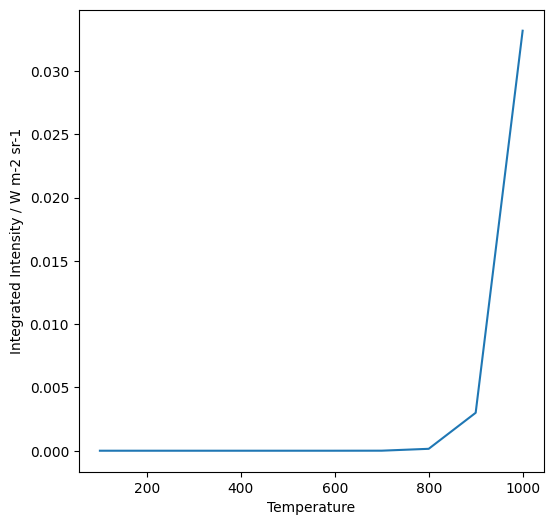

In [140]:
# Let's see if this works

# Let's define some new temperatures
T_couple_s = [100,200,300,400, 500, 600, 700, 800, 900, 1000]

################################################
#### REMINDER: Good Practice
# From now on, let's use capital letters for meta/global/fixed variables
################################################

# Let's define the bandwidth as 400 nm to 700 nm
LAMBDA_0_CAM = 400 * 10 **(-9)
LAMBDA_1_CAM = 700 * 10 **(-9)

# Let's call the integrated_B_blackbody function which returns a list of intensities at those points.
Blackbody_Integrated_Values = integrated_B_blackbody(T_couple_s, LAMBDA_0_CAM, LAMBDA_1_CAM, N)

# For plotting
# Define the axis and figure
fig, ax = plt.subplots(figsize=(6, 6))

# Could be useful to look at log scale plots sometimes
#ax.set_xscale('log')
#ax.set_yscale('log')
# Set the limits
#ax.set_xlim([0, 10**(-4)])
# Set the labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Integrated Intensity / W m-2 sr-1') 
# Plot the intensities
ax.plot(T_couple_s, Blackbody_Integrated_Values)

### 2.5 Check the expression for the Intensity before the integration
Before we move on, let's check if the expressions that we used for the Intensity seems alright.

In [141]:
# This function is based on the B_lambda_T_s_at_T function. 
# No integration is done in this function.
# We want to plot the intensities at each temperature, for a certain wavelength range

def B_lambda_T_s_at_T_plotter(some_T_couple_s, axis, lambda_0_s_for_plotting):
    '''
    Arguments:
    1. some_T_couple_s: a list/ numpy array of temperatures from a thermocouple
    2. axis: an axis object from matplotlib.pyplot on which we can plot the Blackbody radiation curves at each temperature
    3. lambda_0_s_for_plotting = a list of wavelengths at which the intensity values will be plotted

    Returns:
    axis: The same axis object that it received as input but, now with the Blackbody radiation curves plotted in

    Description:
    This function takes in a list/numpy array of thermocouple temperatures at various frames: some_T_couple_s
    plots the Blackbody radiation curves in the range (values) of lambda_0_s_for_plotting which is a list/numpy array of wavelengths
    on the axis object
    and returns the same axis object with plots plotted
    '''

    # For each temperature
    for i in range(np.size(some_T_couple_s)):
        # We did this in B_lambda_T_s_at_T function. 
        # At the current temperature, get the expression for the intensity, with the wavelength yet to be plugged in
        B_expression = (lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )
        # Make this expression which is a function into the format that it can be applied to an array of values
        B_expression_for_array = np.vectorize(B_expression)
        # Apply the expressions for B in terms of wavelength (functions) on the list/numpy array of wavelengths
        B_at_current_T = B_expression_for_array(lambda_0_s_for_plotting)
        # Plot the intensities at this temperature in a curve
        axis.plot(lambda_0_s_for_plotting, B_at_current_T, label='Temperature = '+str(some_T_couple_s[i]) + ' K')

    # Add legend to the curves
    axis.legend()
    return axis

/tmp/ipykernel_13082/1272156040.py:26: RuntimeWarning: overflow encountered in exp
  B_expression = (lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )


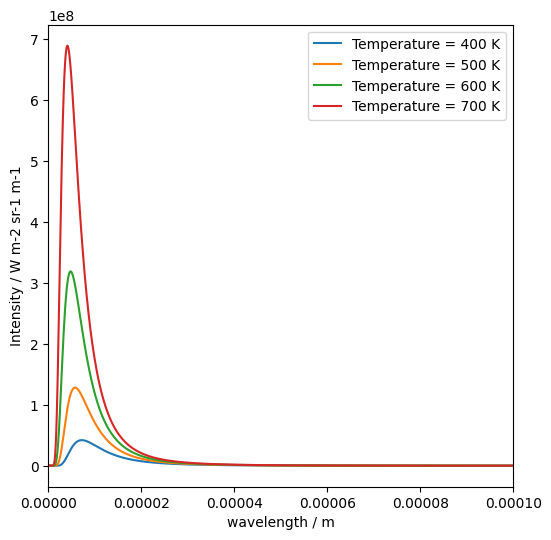

In [142]:
# Let's see if it works

# Define some temperatures
T_couple_s = [400, 500, 600, 700]
# Define wavelengths for plotting, here from 1 nm to 0.1 mm, spaced by orders of magnitude (in an exponential manner)
lambda_0_s_for_plotting = 10 ** np.linspace(-9, -4, 1000)
# Define a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# Sometimes it can be useful to use log scales on the plots. Maybe not the best in this case.
#ax.set_xscale('log')
#ax.set_yscale('log')
# Define limits
ax.set_xlim([0, 10**(-4)])
# Set the labels
ax.set_xlabel('wavelength / m')
ax.set_ylabel('Intensity / W m-2 sr-1 m-1') 

# Call the function B_lambda_T_s_at_T_plotter, which returns an axis object with curves plotted in.
ax = B_lambda_T_s_at_T_plotter(T_couple_s, ax, lambda_0_s_for_plotting)
# Let's have a look at the figure
plt.show()

##### The curves do indeed look like Blackbody radiation curves. So, I think it is ok to move on.

## 2.6 Summary of Section 2
1. In section 2.1, we define the expressions that we will work with, based on lecture notes from a lecture from an Astronomy class at University of Oslo.
2. In section 2.2, we defined the constants. **From now on, we will try to use capital letters for global constants. We did not do this earlier and so that remains unchanged.**
3. In section 2.3, we tried using symbolic substitution to simplify integration, but found out that it might take a long time. So, we decided to do the integration directly. In section 2.3.1, we saw an 1-line example to read data from a csv file. The import procedure, in the real case will not be much more involved.
4. In section 2.4, we developed program to do the integration without using symbolic substitution. We saw that it is reasonably fast, and can do integration with 1000 integration/interpolation points in the same time that using symbolic substitution can do with only 10 integration/interpolation points. 
5. In section 2.5, we check to see if the expressions for the intensity we used in section 2.4 was correct, and the plot seems to look like Blackbody Radiation Curves. We will take this as to say that it is working and move on.

## Takeaways for the pipeline from Section 2.4
**The** integrated_B_blackbody **function, that calls the** B_lambda_T_s_at_T **function inside it.**

## 3. Experiment data
In this section, we will import and ready the experiment data for analysis.

### 3.1 Thermocouple temperature
In this section we will work with the data from the thermocouple

#### 3.1.1 Experiment 1- December 1, 2023
Here we will look at the data from the experiment done on December 1, 2023.

##### 3.1.1.1 Read the data from the excel file 

In [143]:
# Let's read the data from the sheet on 180 A 10 cm min-1 experiment into a pandas dataframe
df_180A_10cm_min_couple= pd.read_excel(open('/home/kushik/Kushik/TU Chemnitz/WS 23 24/Research Project/Emissivity/GitHub/ResearchProject/Experiment Dec 1/Measurement/231201_thermo_couples.xlsx','rb'), sheet_name='180A_10cm_min')

In [144]:
# Let's see what it looks like
df_180A_10cm_min_couple.head()

,t,thermo_1,thermo_2
0,0.1,22.37013,22.87360
1,0.2,22.38240,22.88587
2,0.3,22.38187,22.88587
3,0.4,22.38187,22.88427
4,0.5,22.38400,22.88640


In [145]:
# Let's get the temperature from thermocouple 1
T_couple1_10_cm_min = df_180A_10cm_min_couple['thermo_1'].to_numpy()
# Convert the temperature to Kelvin for blackbody radiation
T_couple1_10_cm_min = 273.15 + T_couple1_10_cm_min
# Let's get the temperature from thermocouple 2 and convert that to Kelvin
T_couple2_10_cm_min = df_180A_10cm_min_couple['thermo_2'].to_numpy()
T_couple2_10_cm_min = 273.15 + T_couple2_10_cm_min

In [146]:
# Let's see what it looks like
T_couple1_10_cm_min

array([295.52013, 295.5324 , 295.53187, ..., 476.16067, 476.1068 ,
       476.03107])

In [147]:
# Let's see what a value looks like
T_couple1_10_cm_min[871]

1417.3937700000001

In [148]:
# Let's see the shape of the data
np.shape(T_couple2_10_cm_min)

(3000,)

In [149]:
# Let's read the data from the sheet on 180 A 20 cm min-1 experiment into a pandas dataframe
df_180A_20cm_min_couple = pd.read_excel(open('/home/kushik/Kushik/TU Chemnitz/WS 23 24/Research Project/Emissivity/GitHub/ResearchProject/Experiment Dec 1/Measurement/231201_thermo_couples.xlsx','rb'), sheet_name='180A_20_cm_min')

In [150]:
# Let's see what it looks like
df_180A_20cm_min_couple.head()

,t,thermo_1,thermo_2
0,0.1,22.09707,22.34027
1,0.2,21.77173,21.98773
2,0.3,21.77067,21.98773
3,0.4,21.77120,21.98987
4,0.5,21.77067,21.98880


In [151]:
# Let's get the temperature from thermocouple 1
T_couple1_20_cm_min = df_180A_20cm_min_couple['thermo_1'].to_numpy()
# Convert the temperature to Kelvin for blackbody radiation
T_couple1_20_cm_min = 273.15 + T_couple1_20_cm_min
# Let's get the temperature from thermocouple 2 and convert that to Kelvin
T_couple2_20_cm_min = df_180A_20cm_min_couple['thermo_2'].to_numpy()
T_couple2_20_cm_min = 273.15 + T_couple2_20_cm_min

In [152]:
# Let's see the shape of the data
np.shape(T_couple2_20_cm_min)

(1145,)

##### 3.1.1.2 Get the integrated blackbody intensity 

In [153]:
# Define the range for integration, i.e. the sensitivity bandwidth of the thermal camera. Here [400 nm, 700 nm]
LAMBDA_0 = 400 * (10 ** (-9))
LAMBDA_1 = 700 * (10 ** (-9))
N = 1000
# Get the blackbody integrated intensity using the integrated_B_blackbody from section 2
T_couple1_10_cm_min_Blackbody_integrated = integrated_B_blackbody(T_couple1_10_cm_min, LAMBDA_0, LAMBDA_1, N)

In [154]:
# Let's see what it looks like
T_couple1_10_cm_min_Blackbody_integrated

[4.636157775592007e-24,
 4.6497662898199164e-24,
 4.649177671585402e-24,
 4.649177671585402e-24,
 4.651543689925876e-24,
 4.653321750345378e-24,
 4.651543689925876e-24,
 4.651543689925876e-24,
 4.651543689925876e-24,
 4.652132599290643e-24,
 4.654511196816299e-24,
 4.6539108784915e-24,
 4.655100471316531e-24,
 4.655100471316531e-24,
 4.655689818322892e-24,
 4.656290359664266e-24,
 4.655689818322892e-24,
 4.655689818322892e-24,
 4.656290359664266e-24,
 4.655689818322892e-24,
 4.656290359664266e-24,
 4.657469419023057e-24,
 4.659249680830349e-24,
 4.658659895866631e-24,
 4.658659895866631e-24,
 4.659249680830349e-24,
 4.659249680830349e-24,
 4.659249680830349e-24,
 4.6598506684461465e-24,
 4.659249680830349e-24,
 4.661631814856742e-24,
 4.660440599922235e-24,
 4.6622219654827455e-24,
 4.663413622931766e-24,
 4.662812188719655e-24,
 4.6622219654827455e-24,
 4.663413622931766e-24,
 4.662812188719655e-24,
 4.662812188719655e-24,
 4.6640039927867195e-24,
 4.664594435278742e-24,
 4.6651960929

In [155]:
# See where the maximum value is
np.argmax(T_couple1_10_cm_min_Blackbody_integrated)

871

In [156]:
# Let's see what that maximum value is
T_couple1_10_cm_min_Blackbody_integrated[871]

21.320089457658952

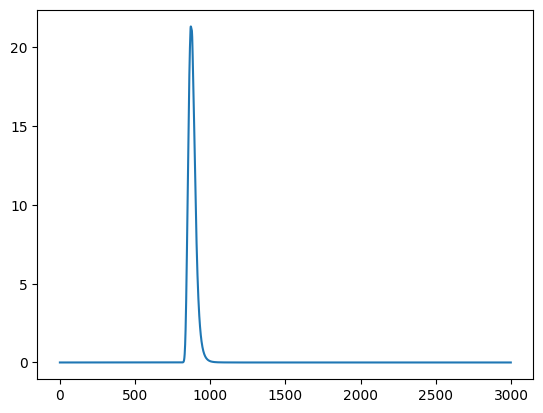

In [157]:
# This is what the integrated intensity would look like plotted against the frame number.
plt.plot(T_couple1_10_cm_min_Blackbody_integrated)

### 3.2 Thermal camera data (temperature and power?)
In this section we will work with the data from the thermal camera

#### 3.2.1 Experiment 1- December 1, 2023
Here we will look at the data from the experiment done on December 1, 2023.

#### 1. Experiment with 10 cm min-1 data

In [158]:
# Let's read the thermocouple data from the pickle file on 180 A 10 cm min-1 experiment into a pandas dataframe
# The word new at the end of the file means that there was another file that did not have in its frame the second thermocouple
# So the pickle file was regenerated with a bigger width (and also slightly bigger height).
# To get the picture of the magnet, we might need to increase the height for one of the videos, for getting the size of the magnet in pixel area
df_180A_10cm_min_cam_new = pd.read_pickle('/home/kushik/Kushik/TU Chemnitz/WS 23 24/Research Project/Emissivity/GitHub/ResearchProject/Experiment Dec 1/Processed Data/180A_10cm_min_new.pkl')

#### 1.a Pixels around the LEFT thermocouple

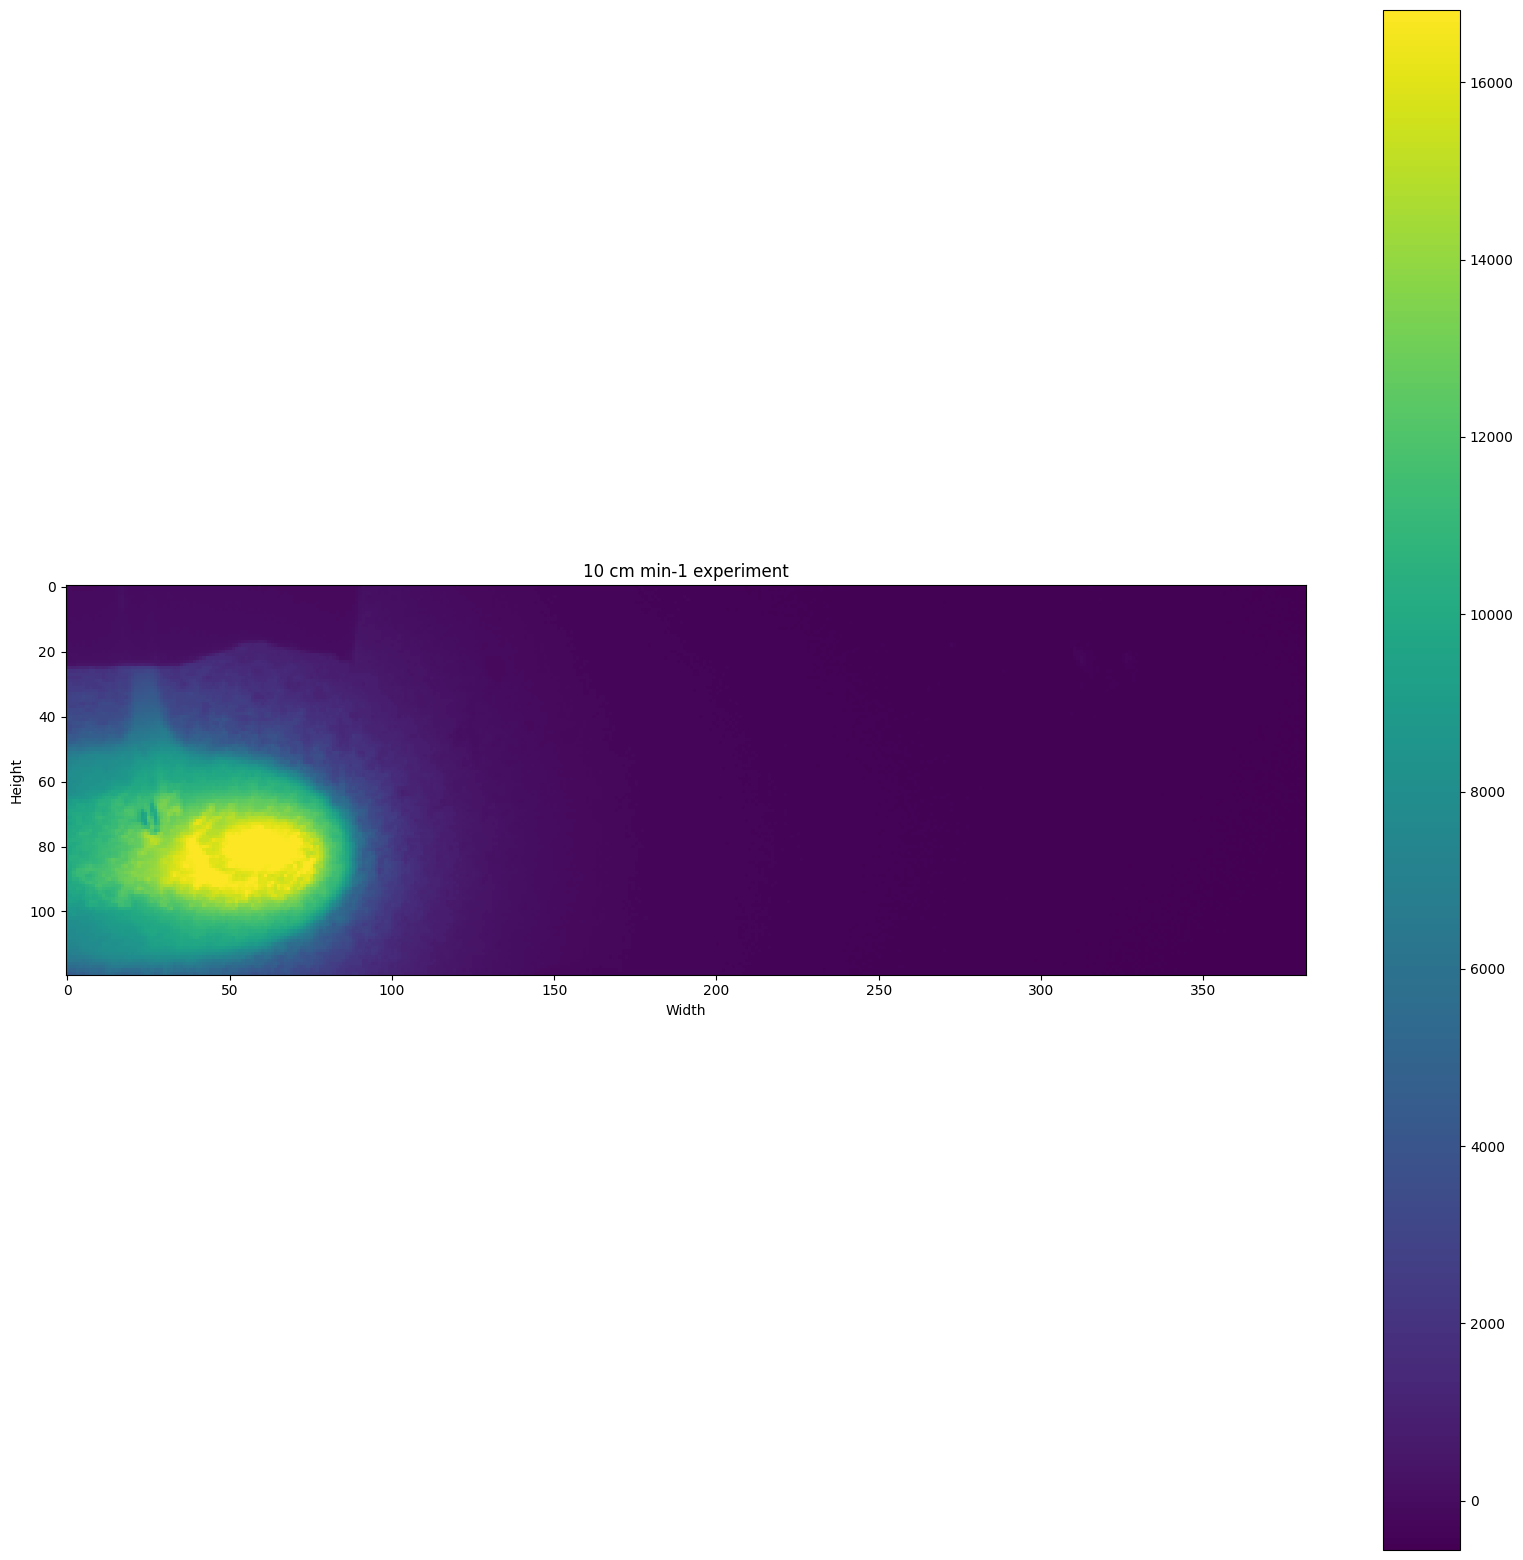

In [159]:
# Let's make a color plot of one frame of the data and see what it looks like
# Set the size of the figure
fig, ax = plt.subplots(figsize=(20, 20))

# Display the image at frame 2377
im = ax.imshow(df_180A_10cm_min_cam_new[2377], cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment')

# Show the plot
plt.show()

##### Let's make a colorplot of the smaller region around the left thermocouple

In [160]:
# For 10 cm min-1 experiment around the left thermocouple
smaller_region_10L = np.zeros((20,20))
for i in range(65,85):
    for j in range(20,40):
        smaller_region_10L[i-65][j-20] = df_180A_10cm_min_cam_new[2377][i][j]

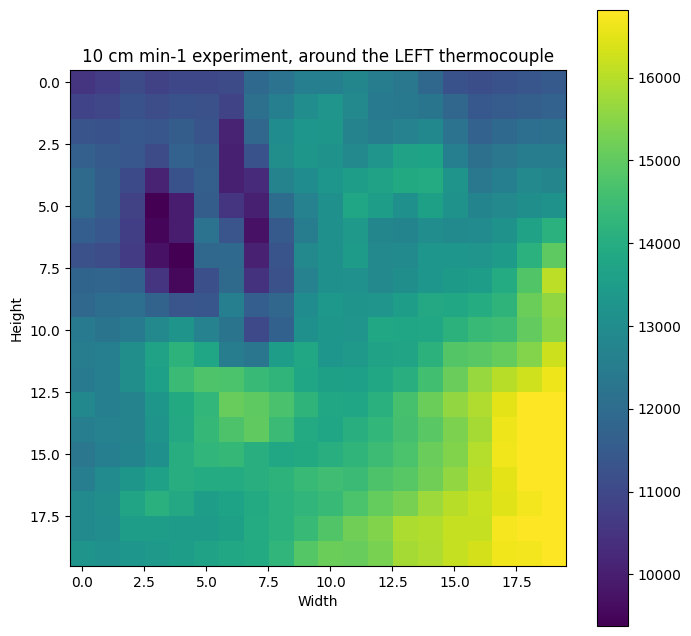

In [161]:
# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(smaller_region_10L, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment, around the LEFT thermocouple')


# Show the plot
plt.show()

#### We can see the two thermocouple wires
Let's zoom in further

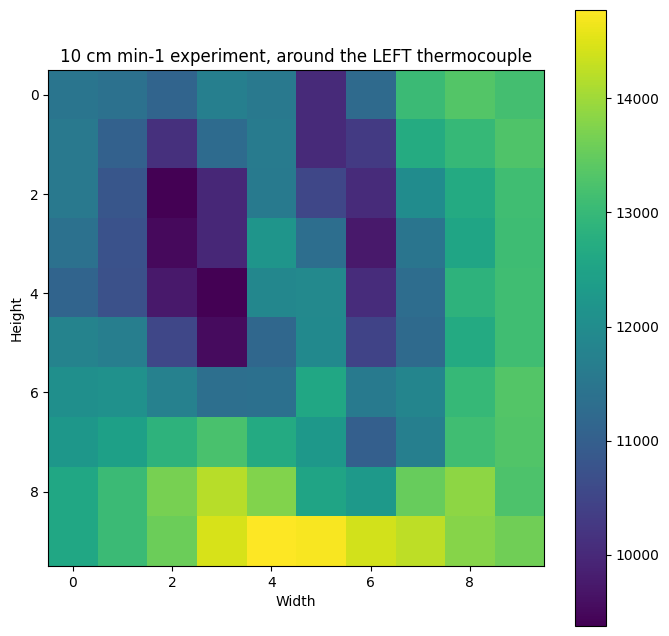

In [162]:
# For 10 cm min-1 experiment around the left thermocouple
much_smaller_region_10L = np.zeros((10,10))
for i in range(68,78):
    for j in range(21,31):
        much_smaller_region_10L[i-68][j-21] = df_180A_10cm_min_cam_new[2377][i][j]

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_10L, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment, around the LEFT thermocouple')

# Show the plot
plt.show()

### Selection of pixels for 10 cm min-1, around LEFT thermocouple
1. **Left**: 4 pixels -- Height: 75 and 76, Width: 23 and 24 
2. **Right**: 4 pixels -- Height: 75 and 76, Width: 29 and 30
3. **Below**: 6 pixels -- Height: 77, Width: 24, 25, 26, 27 ,28, 29
4. Frame used for plotting and selecting: 2377

These pixels appear dark (value = 0) in the next plot.

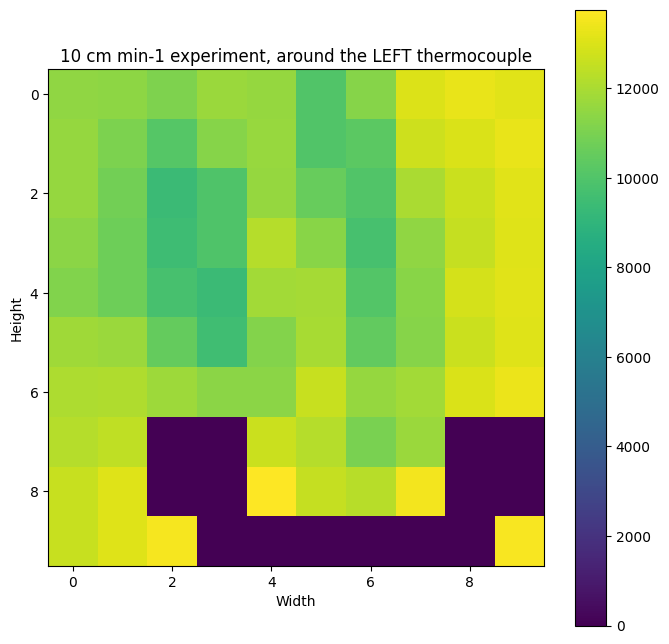

In [163]:
# For 10 cm min-1 experiment around the left thermocouple, we select the pixels to the right, left and below the wires
# Create empty lists to hold the mean and standard deviation of the selected pixels at each frame,...
# to the Left, Right and Below the thermocouple wires for the 10 cm min-1 experiment around the Left thermocouple
Cam_data_10_cm_min_Left_tc_Right_px_mean = []
Cam_data_10_cm_min_Left_tc_Right_px_sd = []

Cam_data_10_cm_min_Left_tc_Left_px_mean = []
Cam_data_10_cm_min_Left_tc_Left_px_sd = []

Cam_data_10_cm_min_Left_tc_Below_px_mean = []
Cam_data_10_cm_min_Left_tc_Below_px_sd = []

# For 10 cm min-1 experiment around the left thermocouple, TO create the plot from previous cell
much_smaller_region_10L = np.zeros((10,10))
for i in range(68,78):
    for j in range(21,31):
        # Get the values for plotting, like in the previous cell
        much_smaller_region_10L[i-68][j-21] = df_180A_10cm_min_cam_new[2377][i][j]
# This represents that the current frame is where the frame just above (also in the plot in the previous cell)...
# the much_smaller_region was plotted
plot_frame = False

# At each frame in the video data
for frame in range(np.shape(df_180A_10cm_min_cam_new)[0]):
    # Create empty list to hold the values of the pixels on the left, right and below the thermocouple wires
    current_elements_right = []
    current_elements_left = []
    current_elements_below = []

    # This is the frame we plotted in the previous cell
    if frame == 2377:
        plot_frame = True
        
    # For the right pixels
    for height in range(75,77):
        for width in range(29,31):
            # Add the values of the pixels to the list of values of pixels to the right of the thermocouple wires in the current frame
            current_elements_right.append(df_180A_10cm_min_cam_new[frame][height][width])

            # For the frame we plotted in the previous cell, set the value to zero so that it appears black when plotting below...
            # So that we know which pixels we selected
            if plot_frame == True:
                much_smaller_region_10L[height-68][width-21] = 0
                
    # For the left pixels likewise
    for height in range(75,77):
        for width in range(23,25):
            current_elements_left.append(df_180A_10cm_min_cam_new[frame][height][width])

            if plot_frame == True:
                much_smaller_region_10L[height-68][width-21] = 0

    # For the pixels below likewise
    for width in range(24,30):
        current_elements_below.append(df_180A_10cm_min_cam_new[frame][77][width])

        if plot_frame == True:
            much_smaller_region_10L[77-68][width-21] = 0

    plot_frame = False

    # Get the mean and standard deviations of the current pixel values in each group: left, right, below, ...
    # and add it to the list that we will use later: 
    # For example: Cam_data_10_cm_min_Left_tc_Right_px_mean may now be considered as the output profile of the thermal camera...
    # to the right of the thermocouple wires
    Cam_data_10_cm_min_Left_tc_Right_px_mean.append(np.mean(current_elements_right))
    Cam_data_10_cm_min_Left_tc_Right_px_sd.append(np.std(current_elements_right))

    Cam_data_10_cm_min_Left_tc_Left_px_mean.append(np.mean(current_elements_left))
    Cam_data_10_cm_min_Left_tc_Left_px_sd.append(np.std(current_elements_left))

    Cam_data_10_cm_min_Left_tc_Below_px_mean.append(np.mean(current_elements_below))
    Cam_data_10_cm_min_Left_tc_Below_px_sd.append(np.std(current_elements_below))

# Some plotting functionality as before, we plot the same frame as before, but now the selected pixels appear black 
# so that we can check which pixels we selected
# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_10L, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment, around the LEFT thermocouple')

# Show the plot
plt.show()

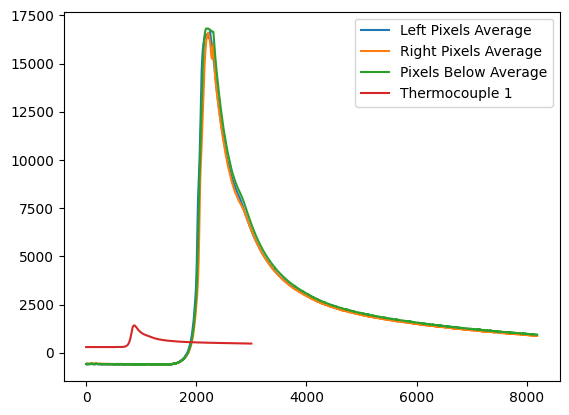

In [164]:
# Let's see what the values look like
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean)[0], np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean)[0]),Cam_data_10_cm_min_Left_tc_Left_px_mean, label='Left Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Left_tc_Right_px_mean)[0], np.shape(Cam_data_10_cm_min_Left_tc_Right_px_mean)[0]),Cam_data_10_cm_min_Left_tc_Right_px_mean, label='Right Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Left_tc_Below_px_mean)[0], np.shape(Cam_data_10_cm_min_Left_tc_Below_px_mean)[0]),Cam_data_10_cm_min_Left_tc_Below_px_mean, label='Pixels Below Average')
plt.plot(np.linspace(0,np.shape(T_couple1_10_cm_min)[0], np.shape(T_couple1_10_cm_min)[0]),T_couple1_10_cm_min, label='Thermocouple 1')
plt.legend()

#### 1.b Pixels around the RIGHT thermocouple

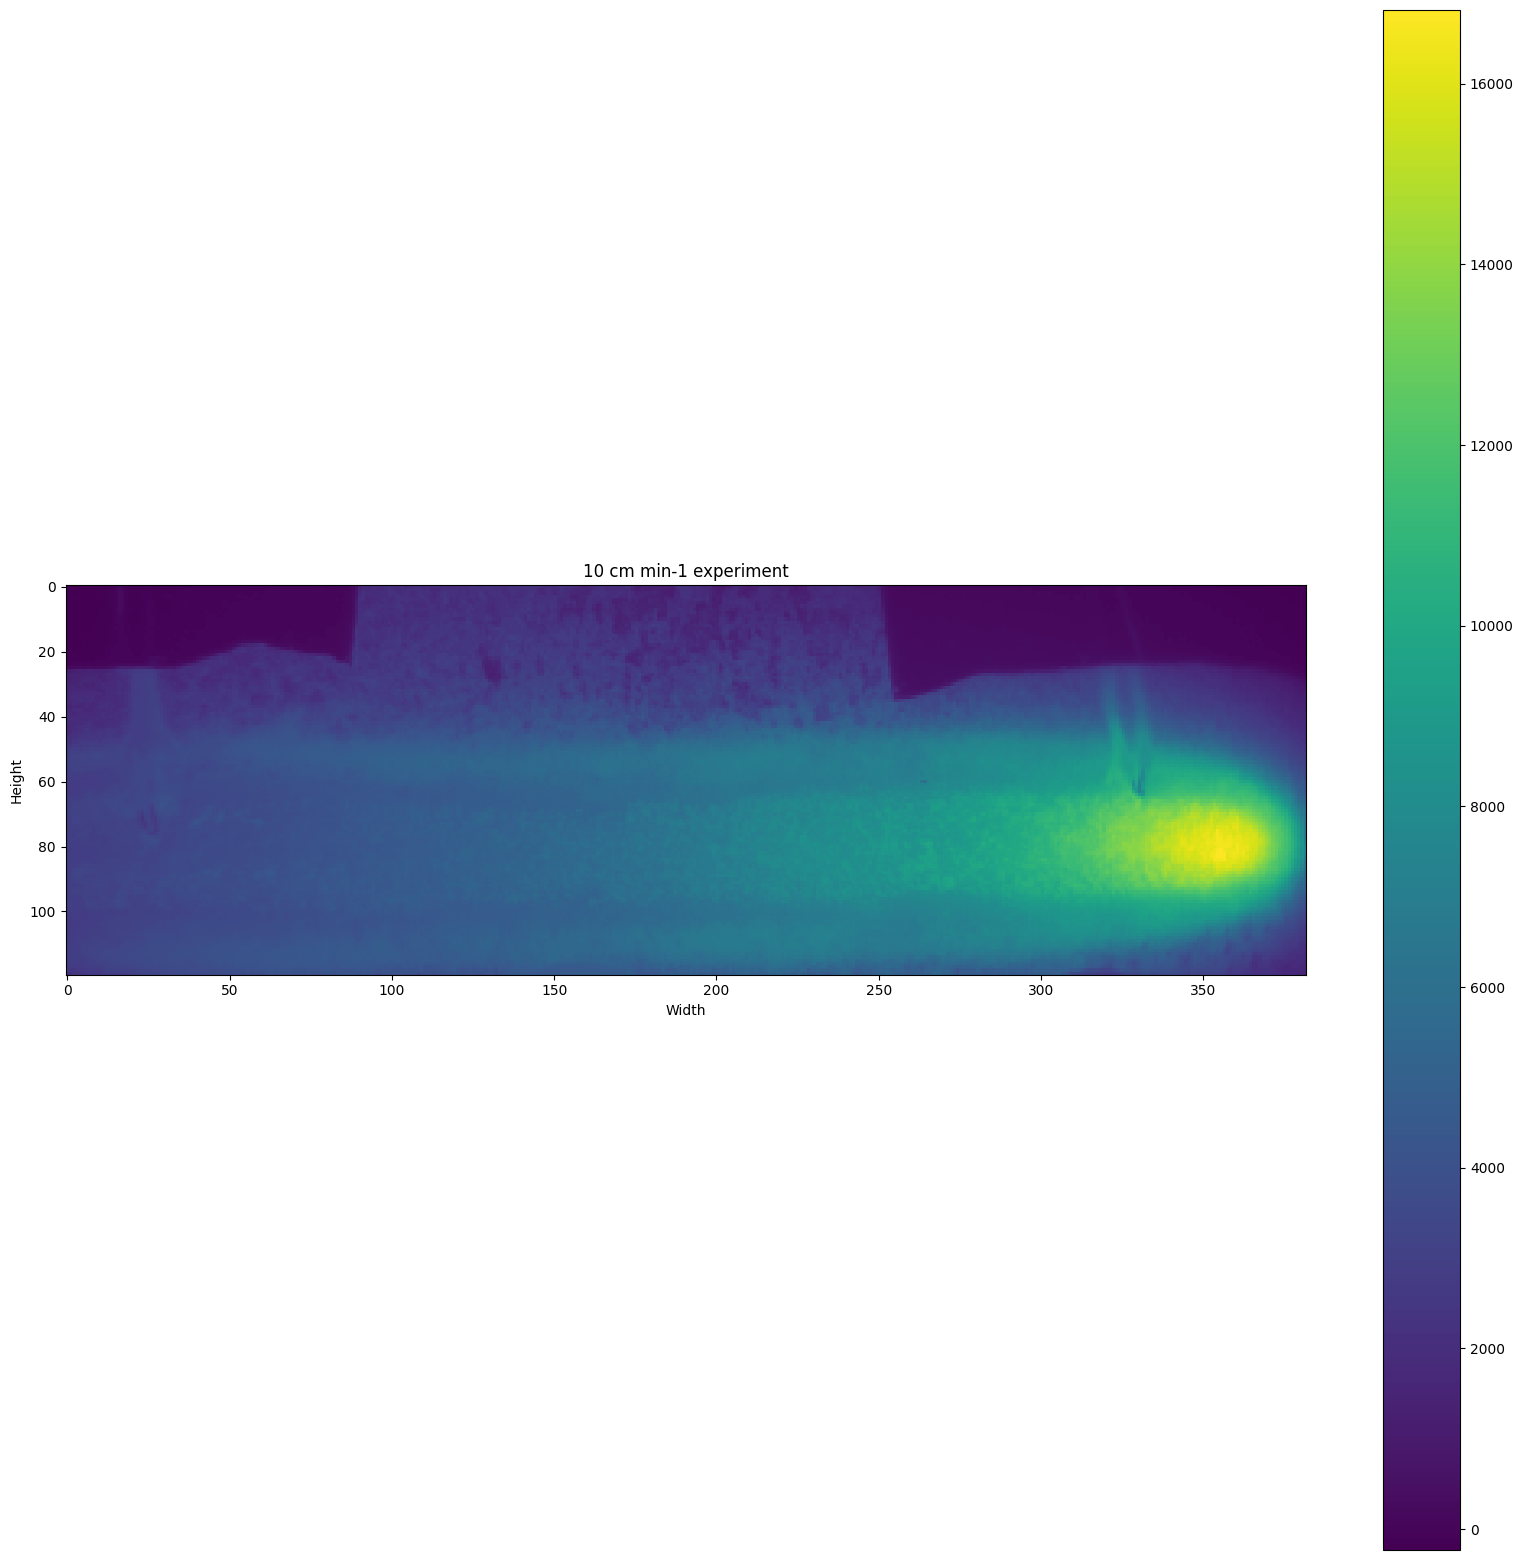

In [165]:
# Let's make a color plot of one frame of the data and see what it looks like when it is bright around the right thermocouple
# Set the size of the figure
fig, ax = plt.subplots(figsize=(20, 20))

# Display the image
im = ax.imshow(df_180A_10cm_min_cam_new[3777], cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment')

# Show the plot
plt.show()

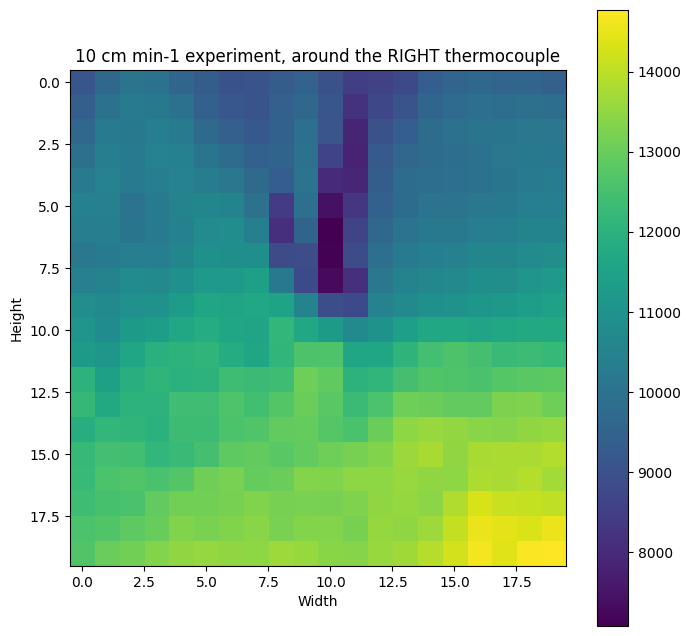

In [166]:
# For 10 cm min-1 experiment around the RIGHT thermocouple
smaller_region_10R = np.zeros((20,20))
for i in range(55,75):
    for j in range(320,340):
        smaller_region_10R[i-55][j-320] = df_180A_10cm_min_cam_new[3777][i][j]
        
# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(smaller_region_10R, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment, around the RIGHT thermocouple')


# Show the plot
plt.show()

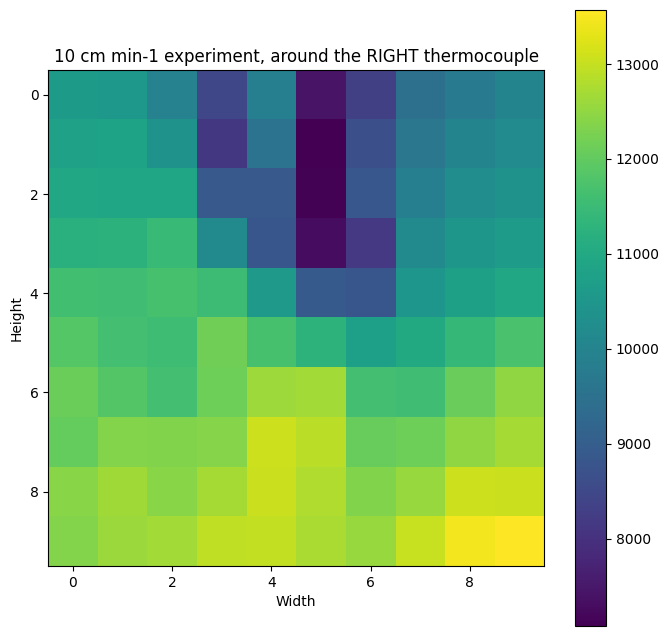

In [167]:
# For 10 cm min-1 experiment around the RIGHT thermocouple
much_smaller_region_10R = np.zeros((10,10))
for i in range(60,70):
    for j in range(325,335):
        much_smaller_region_10R[i-60][j-325] = df_180A_10cm_min_cam_new[3777][i][j]

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_10R, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment, around the RIGHT thermocouple')

# Show the plot
plt.show()

### Selection of pixels for 10 cm min-1, around RIGHT thermocouple
1. **Left**: 4 pixels -- Height: 64 and 65, Width: 327 and 328 
2. **Right**: 4 pixels -- Height: 63 and 64, Width: 332 and 333
3. **Below**: 5 pixels -- Height: 65, Width: 328, 329, 330, 331, 332
4. Frame used for plotting and selecting: 3777

These pixels appear dark (value = 0) in the next plot.

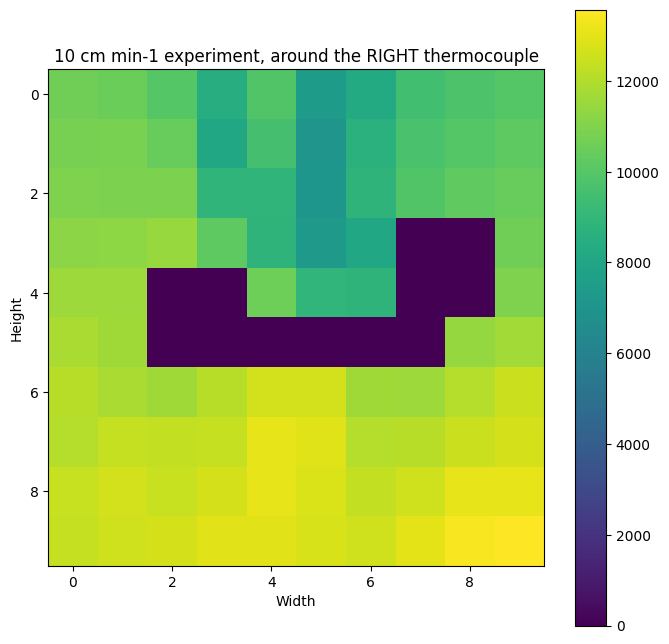

In [168]:
# For 10 cm min-1 experiment around the RIGHT thermocouple, ...
# same as that for the pixels around the LEFT thermocouple that we did just before
Cam_data_10_cm_min_Right_tc_Right_px_mean = []
Cam_data_10_cm_min_Right_tc_Right_px_sd = []

Cam_data_10_cm_min_Right_tc_Left_px_mean = []
Cam_data_10_cm_min_Right_tc_Left_px_sd = []

Cam_data_10_cm_min_Right_tc_Below_px_mean = []
Cam_data_10_cm_min_Right_tc_Below_px_sd = []

# For 10 cm min-1 experiment around the left thermocouple, create the plot from previous cell
much_smaller_region_10R = np.zeros((10,10))
for i in range(60,70):
    for j in range(325,335):
        much_smaller_region_10R[i-60][j-325] = df_180A_10cm_min_cam_new[3777][i][j]
plot_frame = False

for frame in range(np.shape(df_180A_10cm_min_cam_new)[0]):
    current_elements_right = []
    current_elements_left = []
    current_elements_below = []

    if frame == 3777:
        plot_frame = True
    # For the right pixels
    for height in range(63,65):
        for width in range(332,334):
            current_elements_right.append(df_180A_10cm_min_cam_new[frame][height][width])

            if plot_frame == True:
                much_smaller_region_10R[height-60][width-325] = 0
                
    # For the left pixels
    for height in range(64,66):
        for width in range(327,329):
            current_elements_left.append(df_180A_10cm_min_cam_new[frame][height][width])

            if plot_frame == True:
                much_smaller_region_10R[height-60][width-325] = 0

    # For the pixels below
    for width in range(328,333):
        current_elements_below.append(df_180A_10cm_min_cam_new[frame][65][width])

        if plot_frame == True:
            much_smaller_region_10R[65-60][width-325] = 0

    plot_frame = False

    Cam_data_10_cm_min_Right_tc_Right_px_mean.append(np.mean(current_elements_right))
    Cam_data_10_cm_min_Right_tc_Right_px_sd.append(np.std(current_elements_right))

    Cam_data_10_cm_min_Right_tc_Left_px_mean.append(np.mean(current_elements_left))
    Cam_data_10_cm_min_Right_tc_Left_px_sd.append(np.std(current_elements_left))

    Cam_data_10_cm_min_Right_tc_Below_px_mean.append(np.mean(current_elements_below))
    Cam_data_10_cm_min_Right_tc_Below_px_sd.append(np.std(current_elements_below))

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_10R, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('10 cm min-1 experiment, around the RIGHT thermocouple')

# Show the plot
plt.show()

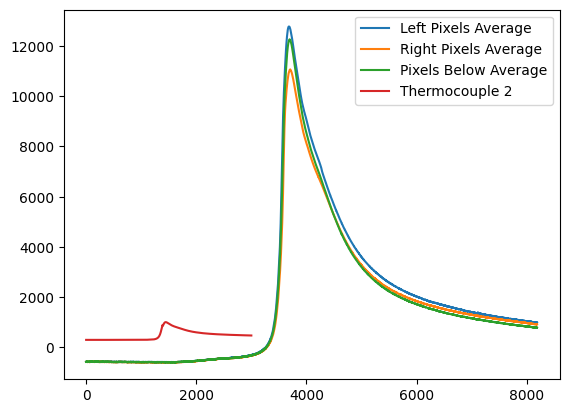

In [169]:
# Let's see what the values look like
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean)[0], np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean)[0]),Cam_data_10_cm_min_Right_tc_Left_px_mean, label='Left Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Right_tc_Right_px_mean)[0], np.shape(Cam_data_10_cm_min_Right_tc_Right_px_mean)[0]),Cam_data_10_cm_min_Right_tc_Right_px_mean, label='Right Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Right_tc_Below_px_mean)[0], np.shape(Cam_data_10_cm_min_Right_tc_Below_px_mean)[0]),Cam_data_10_cm_min_Right_tc_Below_px_mean, label='Pixels Below Average')
plt.plot(np.linspace(0,np.shape(T_couple2_10_cm_min)[0], np.shape(T_couple2_10_cm_min)[0]),T_couple2_10_cm_min, label='Thermocouple 2')
plt.legend()

#### 2. Experiment with 20 cm min-1 data

In [170]:
# Let's read the thermocouple data from the pickle file on 180 A 20 cm min-1 experiment into a pandas dataframe
# The word new at the end of the file means that there was another file that did not have in its frame the second thermocouple
# So the pickle file was regenerated with a bigger width (and also slightly bigger height).
# To get the picture of the magnet, we might need to increase the height for one of the videos, for getting the size of the magnet in pixel area
df_180A_20cm_min_cam_new = pd.read_pickle('/home/kushik/Kushik/TU Chemnitz/WS 23 24/Research Project/Emissivity/GitHub/ResearchProject/Experiment Dec 1/Processed Data/180A_20cm_min_new.pkl')

#### 2.a Pixels around the LEFT thermocouple

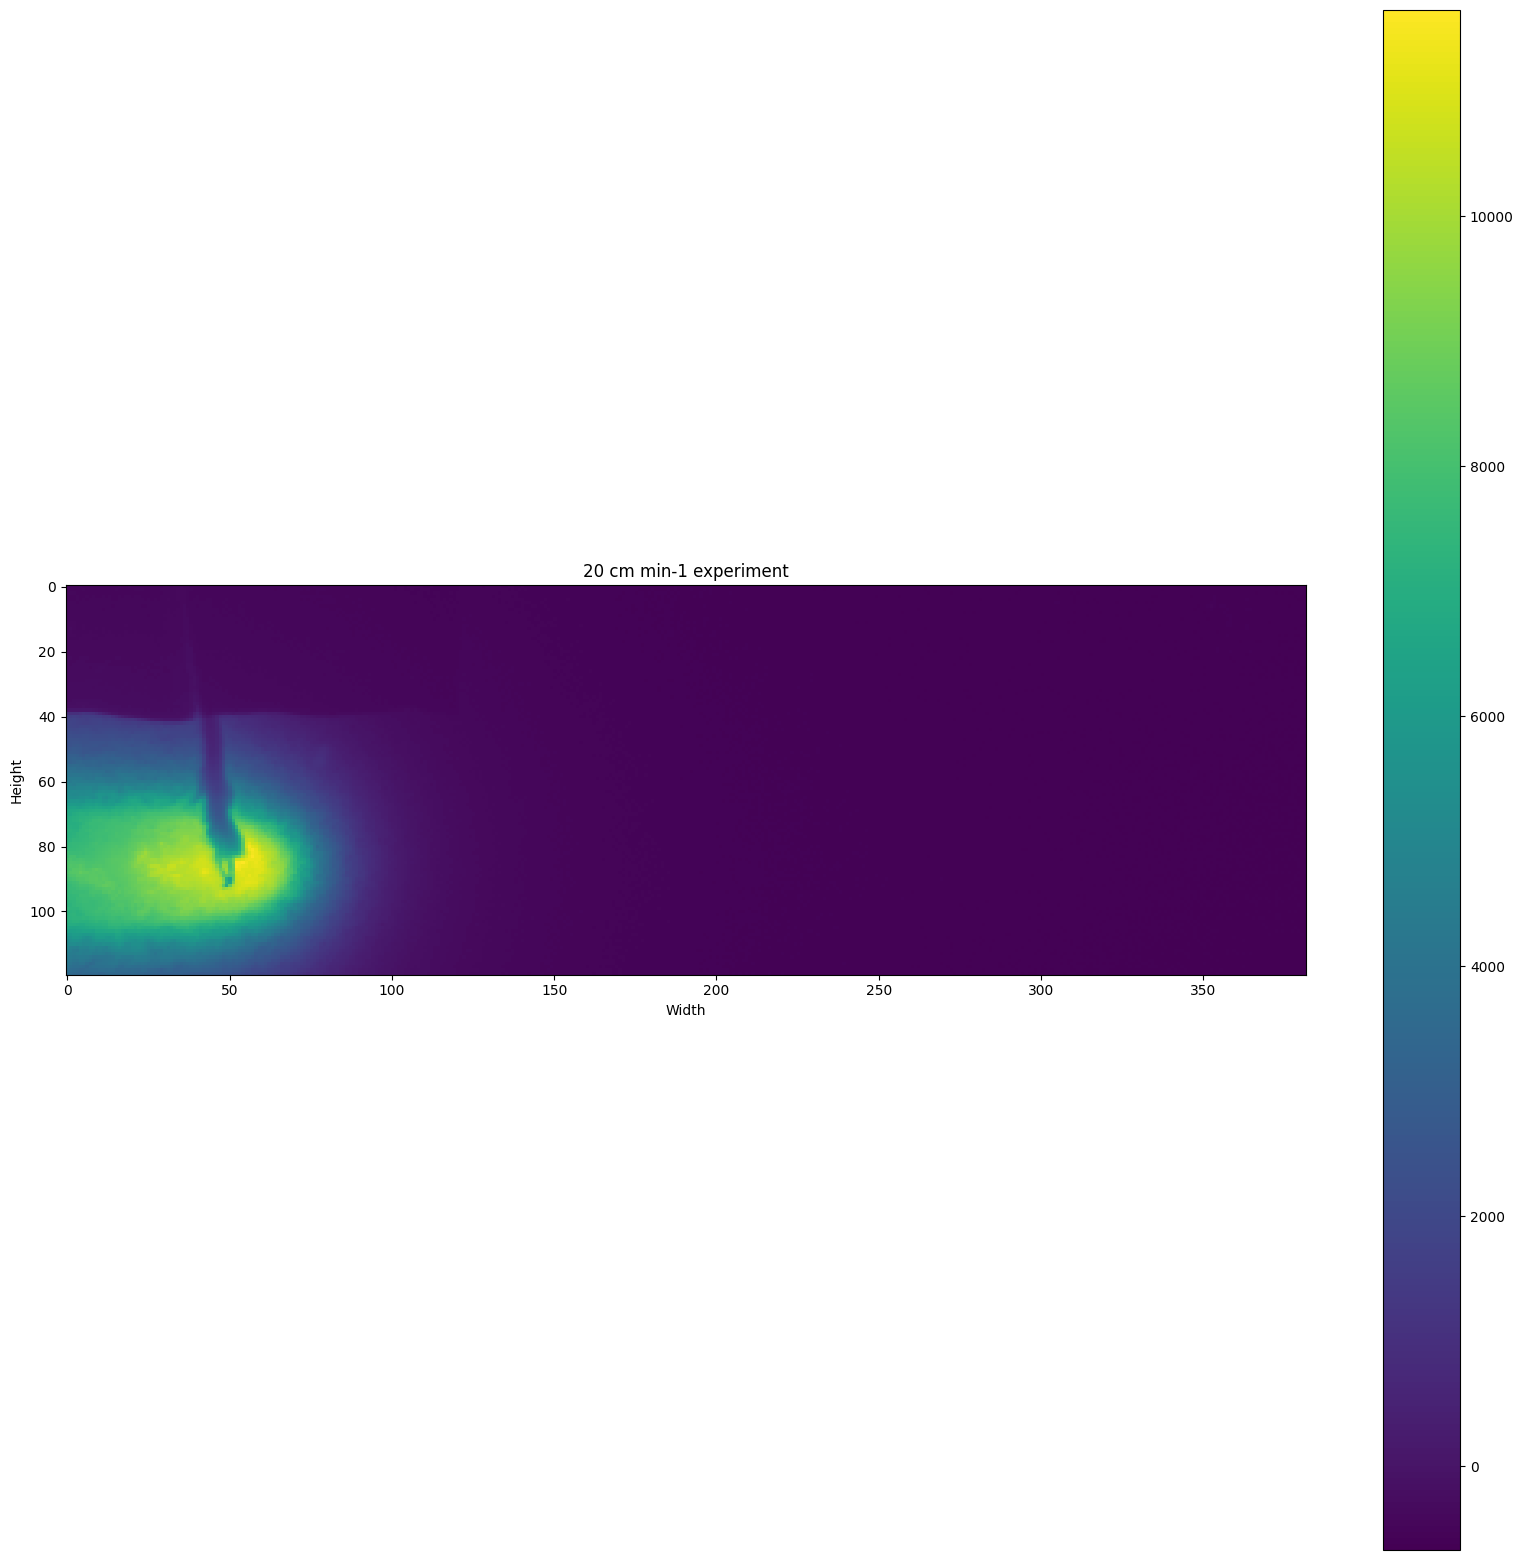

In [171]:
# Let's make a color plot of one frame of the data and see what it looks like
# Set the size of the figure
fig, ax = plt.subplots(figsize=(20, 20))

# Display the image
im = ax.imshow(df_180A_20cm_min_cam_new[1577], cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment')

# Show the plot
plt.show()

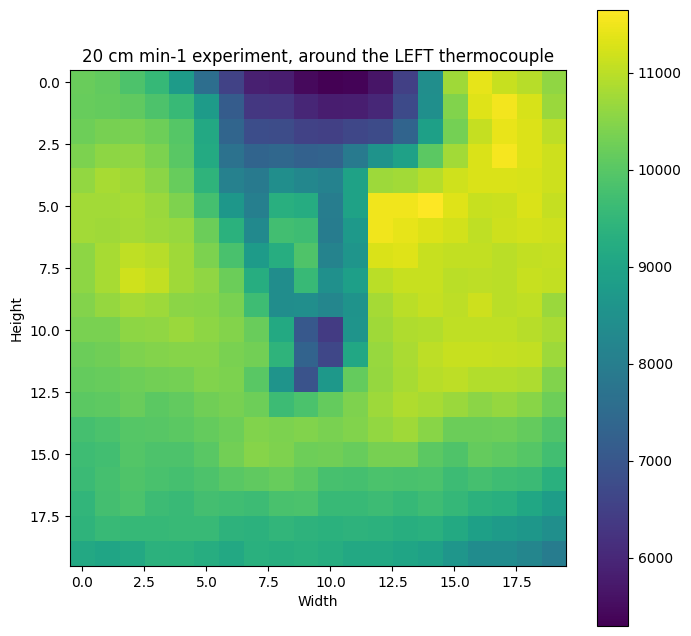

In [172]:
# For 20 cm min-1 experiment around the left thermocouple
smaller_region_20L = np.zeros((20,20))
for i in range(80,100):
    for j in range(40,60):
        smaller_region_20L[i-80][j-40] = df_180A_20cm_min_cam_new[1577][i][j]

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(smaller_region_20L, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment, around the LEFT thermocouple')


# Show the plot
plt.show()

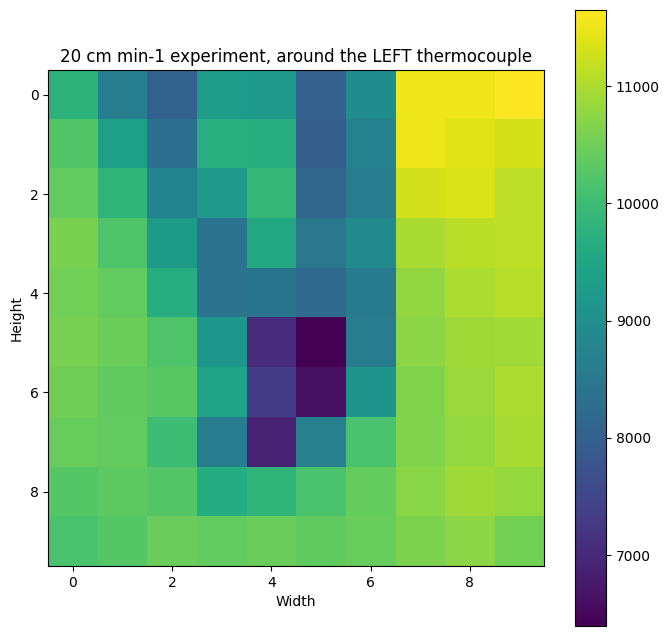

In [173]:
# For 20 cm min-1 experiment around the left thermocouple
much_smaller_region_20L = np.zeros((10,10))
for i in range(85,95):
    for j in range(45,55):
        much_smaller_region_20L[i-85][j-45] = df_180A_20cm_min_cam_new[1577][i][j]

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_20L, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment, around the LEFT thermocouple')

# Show the plot
plt.show()

### Selection of pixels for 20 cm min-1, around LEFT thermocouple
1. **Left**: 4 pixels -- Height: 91 and 92, Width: 46 and 47 
2. **Right**: 4 pixels -- Height: 91 and 92, Width: 52 and 53
3. **Below**: 5 pixels -- Height: 94, Width: 47, 48, 49, 50, 51
4. Frame used for plotting and selecting: 1577

These pixels appear dark (value = 0) in the next plot.

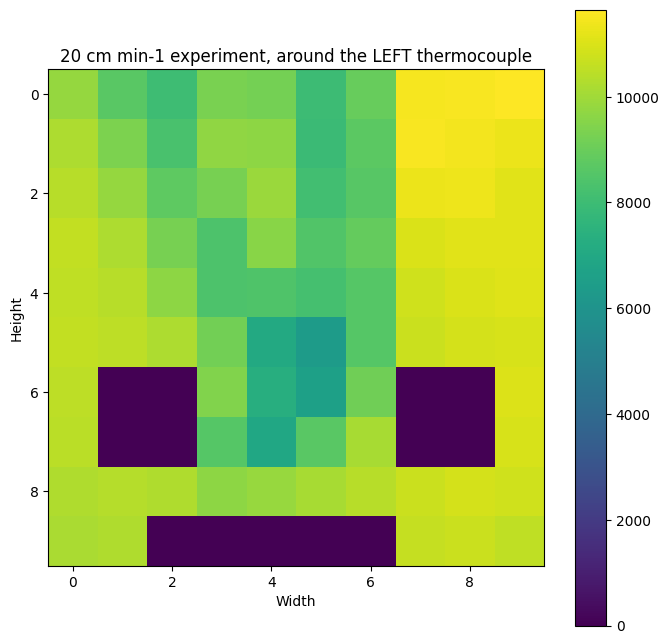

In [174]:
# For 20 cm min-1 experiment around the left thermocouple, we select the pixels to the right, left and below the wires
Cam_data_20_cm_min_Left_tc_Right_px_mean = []
Cam_data_20_cm_min_Left_tc_Right_px_sd = []

Cam_data_20_cm_min_Left_tc_Left_px_mean = []
Cam_data_20_cm_min_Left_tc_Left_px_sd = []

Cam_data_20_cm_min_Left_tc_Below_px_mean = []
Cam_data_20_cm_min_Left_tc_Below_px_sd = []

# For 20 cm min-1 experiment around the left thermocouple, create the plot from previous cell
much_smaller_region_20L = np.zeros((10,10))
for i in range(85,95):
    for j in range(45,55):
        much_smaller_region_20L[i-85][j-45] = df_180A_20cm_min_cam_new[1577][i][j]

plot_frame = False

for frame in range(np.shape(df_180A_20cm_min_cam_new)[0]):
    current_elements_right = []
    current_elements_left = []
    current_elements_below = []

    if frame == 1577:
        plot_frame = True
    # For the right pixels
    for height in range(91,93):
        for width in range(52,54):
            current_elements_right.append(df_180A_20cm_min_cam_new[frame][height][width])

            if plot_frame == True:
                much_smaller_region_20L[height-85][width-45] = 0
                
    # For the left pixels
    for height in range(91,93):
        for width in range(46,48):
            current_elements_left.append(df_180A_20cm_min_cam_new[frame][height][width])

            if plot_frame == True:
                much_smaller_region_20L[height-85][width-45] = 0

    # For the pixels below
    for width in range(47,52):
        current_elements_below.append(df_180A_20cm_min_cam_new[frame][94][width])

        if plot_frame == True:
            much_smaller_region_20L[94-85][width-45] = 0

    plot_frame = False

    Cam_data_20_cm_min_Left_tc_Right_px_mean.append(np.mean(current_elements_right))
    Cam_data_20_cm_min_Left_tc_Right_px_sd.append(np.std(current_elements_right))

    Cam_data_20_cm_min_Left_tc_Left_px_mean.append(np.mean(current_elements_left))
    Cam_data_20_cm_min_Left_tc_Left_px_sd.append(np.std(current_elements_left))

    Cam_data_20_cm_min_Left_tc_Below_px_mean.append(np.mean(current_elements_below))
    Cam_data_20_cm_min_Left_tc_Below_px_sd.append(np.std(current_elements_below))

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_20L, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment, around the LEFT thermocouple')

# Show the plot
plt.show()

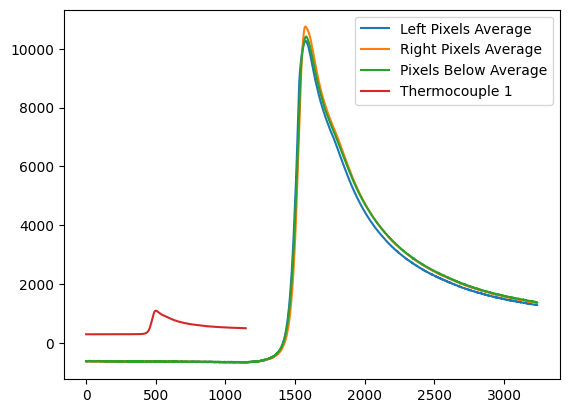

In [175]:
# Let's see what the values look like
plt.plot(np.linspace(0,np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean)[0], np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean)[0]),Cam_data_20_cm_min_Left_tc_Left_px_mean, label='Left Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_20_cm_min_Left_tc_Right_px_mean)[0], np.shape(Cam_data_20_cm_min_Left_tc_Right_px_mean)[0]),Cam_data_20_cm_min_Left_tc_Right_px_mean, label='Right Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_20_cm_min_Left_tc_Below_px_mean)[0], np.shape(Cam_data_20_cm_min_Left_tc_Below_px_mean)[0]),Cam_data_20_cm_min_Left_tc_Below_px_mean, label='Pixels Below Average')
plt.plot(np.linspace(0,np.shape(T_couple1_20_cm_min)[0], np.shape(T_couple1_20_cm_min)[0]),T_couple1_20_cm_min, label='Thermocouple 1')
plt.legend()

#### 2.b Pixels around the RIGHT thermocouple

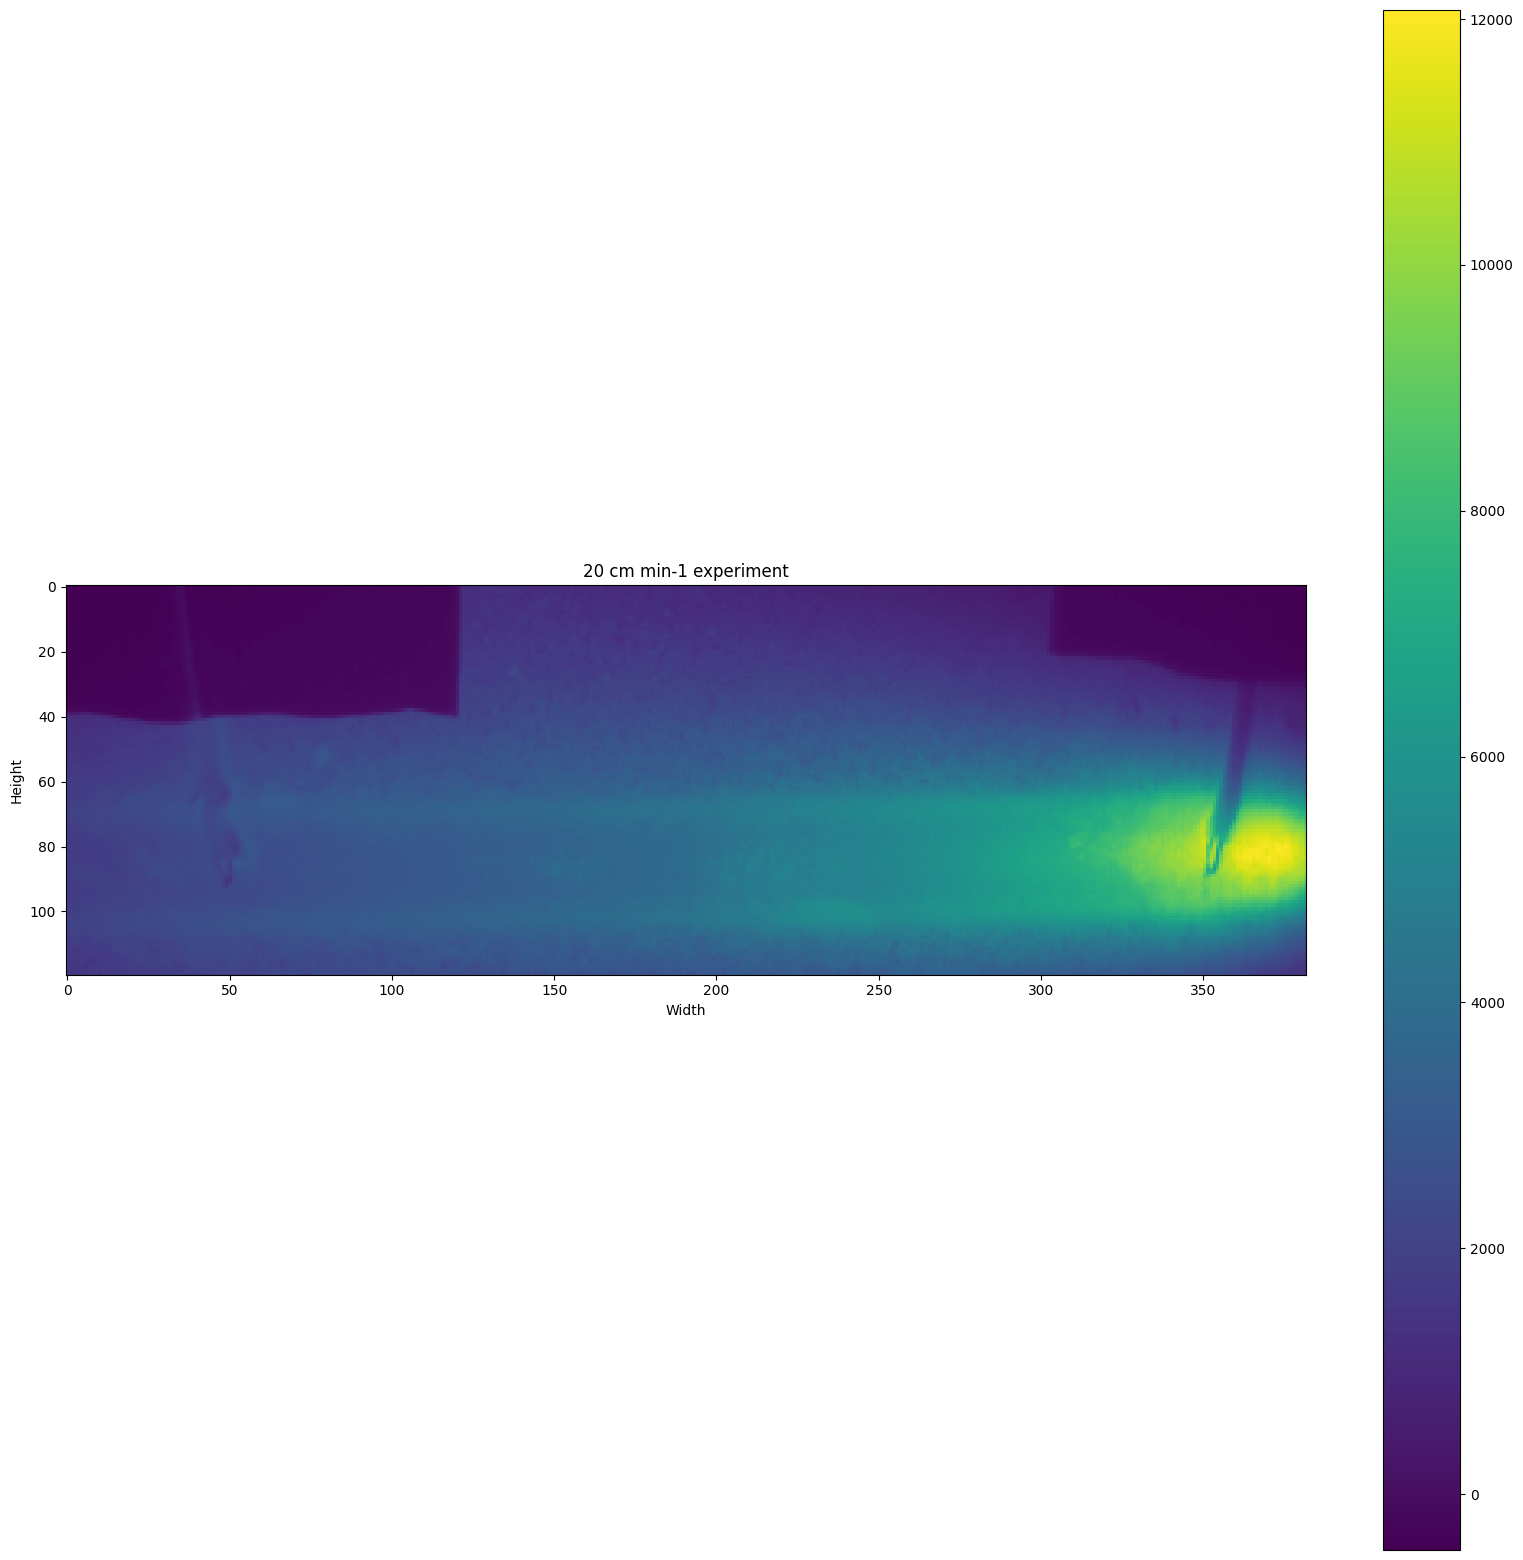

In [176]:
# Let's make a color plot of one frame of the data and see what it looks like when it is bright around the right thermocouple
# Set the size of the figure
fig, ax = plt.subplots(figsize=(20, 20))

# Display the image
im = ax.imshow(df_180A_20cm_min_cam_new[2500], cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment')

# Show the plot
plt.show()

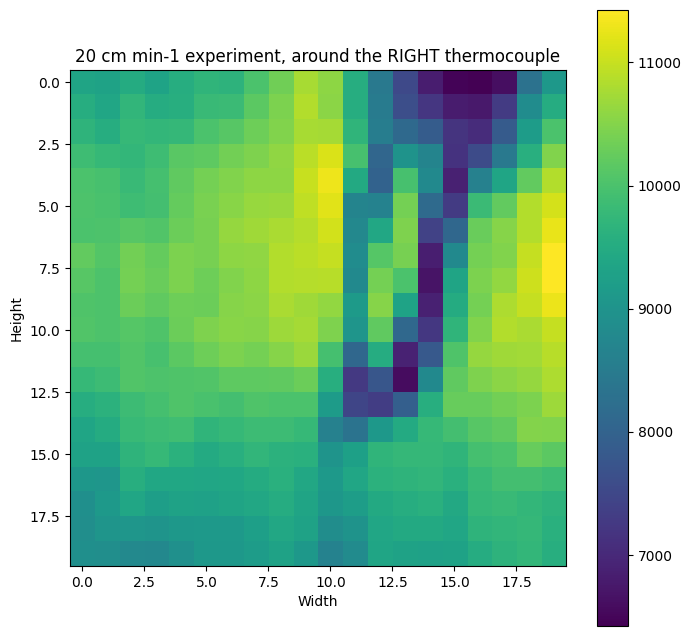

In [177]:
# For 20 cm min-1 experiment around the RIGHT thermocouple
smaller_region_20R = np.zeros((20,20))
for i in range(75,95):
    for j in range(340,360):
        smaller_region_20R[i-75][j-340] = df_180A_20cm_min_cam_new[2500][i][j]
        
# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(smaller_region_20R, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment, around the RIGHT thermocouple')


# Show the plot
plt.show()

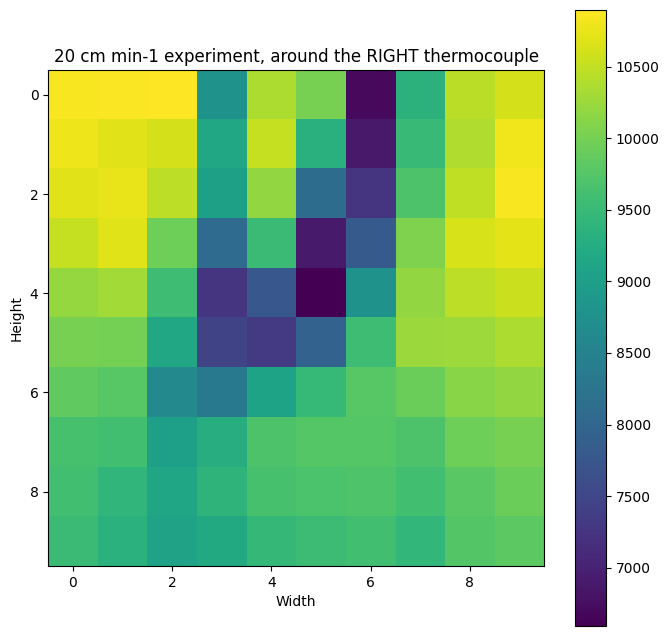

In [178]:
# For 20 cm min-1 experiment around the RIGHT thermocouple
much_smaller_region_20R = np.zeros((10,10))
for i in range(83,93):
    for j in range(348,358):
        much_smaller_region_20R[i-83][j-348] = df_180A_20cm_min_cam_new[2500][i][j]

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_20R, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment, around the RIGHT thermocouple')

# Show the plot
plt.show()

### Selection of pixels for 20 cm min-1, around RIGHT thermocouple
1. **Left**: 4 pixels -- Height: 87 and 88, Width: 348 and 349 
2. **Right**: 4 pixels -- Height: 87 and 88, Width: 355 and 356
3. **Below**: 4 pixels -- Height: 90, Width: 350, 351, 352, 353
4. Frame used for plotting and selecting: 2500

These pixels appear dark (value = 0) in the next plot.

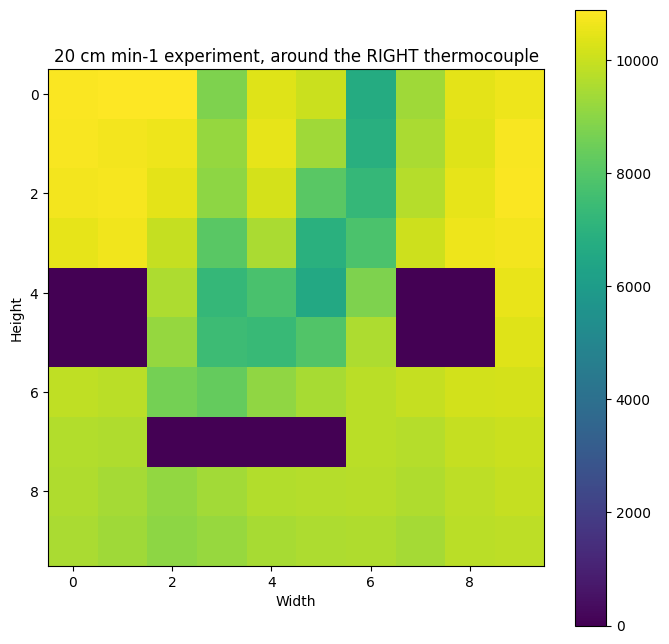

In [179]:
# For 20 cm min-1 experiment around the RIGHT thermocouple, we select the pixels to the right, left and below the wires
Cam_data_20_cm_min_Right_tc_Right_px_mean = []
Cam_data_20_cm_min_Right_tc_Right_px_sd = []

Cam_data_20_cm_min_Right_tc_Left_px_mean = []
Cam_data_20_cm_min_Right_tc_Left_px_sd = []

Cam_data_20_cm_min_Right_tc_Below_px_mean = []
Cam_data_20_cm_min_Right_tc_Below_px_sd = []

# For 20 cm min-1 experiment around the left thermocouple, create the plot from previous cell
much_smaller_region_20R = np.zeros((10,10))
for i in range(83,93):
    for j in range(348,358):
        much_smaller_region_20R[i-83][j-348] = df_180A_20cm_min_cam_new[2500][i][j]

plot_frame = False

for frame in range(np.shape(df_180A_20cm_min_cam_new)[0]):
    current_elements_right = []
    current_elements_left = []
    current_elements_below = []

    if frame == 2500:
        plot_frame = True
    # For the right pixels
    for height in range(87,89):
        for width in range(355,357):
            current_elements_right.append(df_180A_20cm_min_cam_new[frame][height][width])

            if plot_frame == True:
                much_smaller_region_20R[height-83][width-348] = 0
                
    # For the left pixels
    for height in range(87,89):
        for width in range(348,350):
            current_elements_left.append(df_180A_20cm_min_cam_new[frame][height][width])

            if plot_frame == True:
                much_smaller_region_20R[height-83][width-348] = 0

    # For the pixels below
    for width in range(350,354):
        current_elements_below.append(df_180A_20cm_min_cam_new[frame][90][width])

        if plot_frame == True:
            much_smaller_region_20R[90-83][width-348] = 0

    plot_frame = False

    Cam_data_20_cm_min_Right_tc_Right_px_mean.append(np.mean(current_elements_right))
    Cam_data_20_cm_min_Right_tc_Right_px_sd.append(np.std(current_elements_right))

    Cam_data_20_cm_min_Right_tc_Left_px_mean.append(np.mean(current_elements_left))
    Cam_data_20_cm_min_Right_tc_Left_px_sd.append(np.std(current_elements_left))

    Cam_data_20_cm_min_Right_tc_Below_px_mean.append(np.mean(current_elements_below))
    Cam_data_20_cm_min_Right_tc_Below_px_sd.append(np.std(current_elements_below))

# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(much_smaller_region_20R, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_title('20 cm min-1 experiment, around the RIGHT thermocouple')

# Show the plot
plt.show()

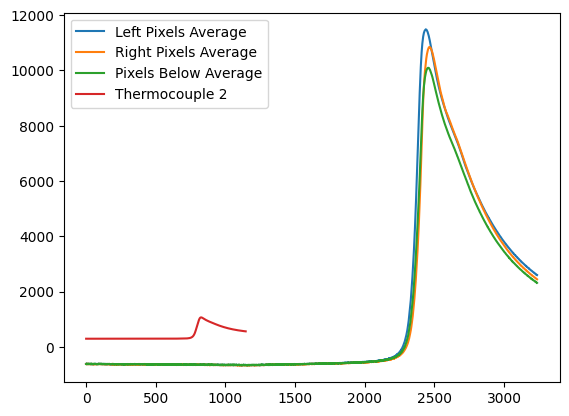

In [180]:
# Let's see what the values look like
plt.plot(np.linspace(0,np.shape(Cam_data_20_cm_min_Right_tc_Left_px_mean)[0], np.shape(Cam_data_20_cm_min_Right_tc_Left_px_mean)[0]),Cam_data_20_cm_min_Right_tc_Left_px_mean, label='Left Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_20_cm_min_Right_tc_Right_px_mean)[0], np.shape(Cam_data_20_cm_min_Right_tc_Right_px_mean)[0]),Cam_data_20_cm_min_Right_tc_Right_px_mean, label='Right Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_20_cm_min_Right_tc_Below_px_mean)[0], np.shape(Cam_data_20_cm_min_Right_tc_Below_px_mean)[0]),Cam_data_20_cm_min_Right_tc_Below_px_mean, label='Pixels Below Average')
plt.plot(np.linspace(0,np.shape(T_couple2_20_cm_min)[0], np.shape(T_couple2_20_cm_min)[0]),T_couple2_20_cm_min, label='Thermocouple 2')
plt.legend()

### Slightly scrap only for reference

##### 3.2.1.2 Some scrap analysis, Might remove later

(3000,)


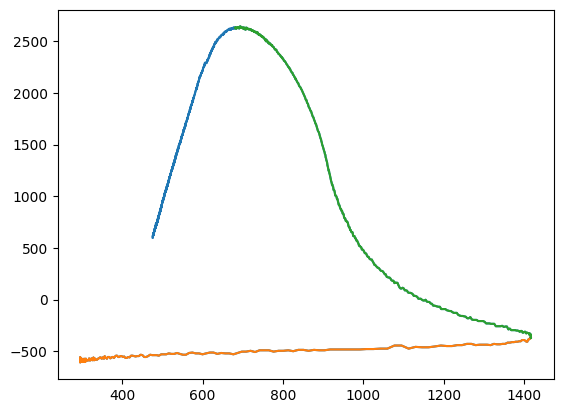

In [181]:
small_camera_data = []
for i in range(3000):
    if i%3 ==0:
        if i <811 and i!=0:
            small_camera_data.append(small_camera_data[-1]) 
    current_index = i * 3
    if current_index < 8189:
        current_frame = df_180A_10cm_min_cam_new[current_index]
        small_camera_data.append(current_frame[25][83])
print(np.shape(small_camera_data))

plt.plot(T_couple1_10_cm_min, small_camera_data)
plt.plot(T_couple1_10_cm_min[:870], small_camera_data[:870])
plt.plot(T_couple1_10_cm_min[870:1350], small_camera_data[870:1350])


Parameter a_0: 31431.08441332479
Parameter a_1: -269.93983671210464
Parameter a_2: 0.8129543132182849
Parameter a_3: -0.0010805832141754241
Parameter a_4: 6.550369317030765e-07
Parameter a_5: 1.4847980569833376e-10


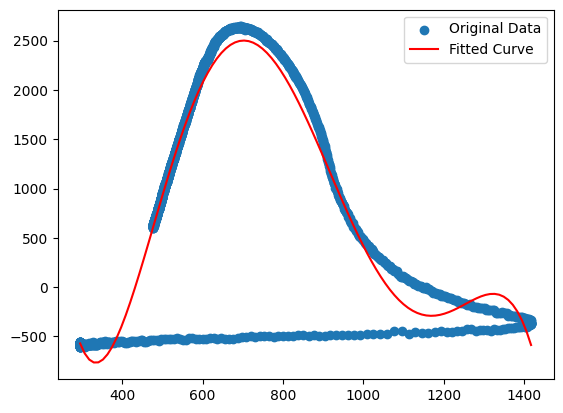

In [182]:
nonlinear_model = lambda x, a_0,a_1,a_2,a_3,a_4,a_5: - a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2 + a_1 * x + a_0

# Initial guess for parameters a and b
initial_guess = [1, -10]

# Use curve_fit to perform non-linear regression
#params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min, small_camera_data, p0=initial_guess)
params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min, small_camera_data)

# Extract the parameters
a_0,a_1,a_2,a_3,a_4,a_5 = params

# Print the results
print(f'Parameter a_0: {a_0}')
print(f'Parameter a_1: {a_1}')
print(f'Parameter a_2: {a_2}')
print(f'Parameter a_3: {a_3}')
print(f'Parameter a_4: {a_4}')
print(f'Parameter a_5: {a_5}')

# Plot the original data and the fitted curve
x_fit = np.linspace(min(T_couple1_10_cm_min), max(T_couple1_10_cm_min), 100)
y_fit = nonlinear_model(x_fit, a_0,a_1,a_2,a_3,a_4,a_5)

plt.scatter(T_couple1_10_cm_min, small_camera_data, label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.show()

Parameter a_0: -593948.4052353585
Parameter a_1: 5199.650232375534
Parameter a_2: -18.181621871498145
Parameter a_3: 0.031647490427820085
Parameter a_4: -2.7316213700189455e-05
Parameter a_5: -9.337361132520553e-09


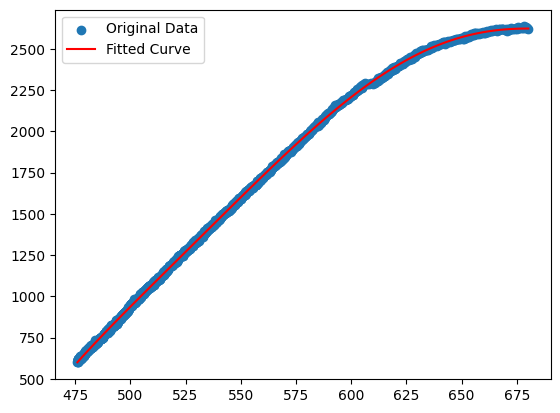

In [183]:
nonlinear_model = lambda x, a_0,a_1,a_2,a_3,a_4,a_5: - a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2 + a_1 * x + a_0

# Initial guess for parameters a and b
initial_guess = [1, -10]

# Use curve_fit to perform non-linear regression
#params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min, small_camera_data, p0=initial_guess)
params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min[1350:], small_camera_data[1350:])

# Extract the parameters
a_0,a_1,a_2,a_3,a_4,a_5 = params

# Print the results
print(f'Parameter a_0: {a_0}')
print(f'Parameter a_1: {a_1}')
print(f'Parameter a_2: {a_2}')
print(f'Parameter a_3: {a_3}')
print(f'Parameter a_4: {a_4}')
print(f'Parameter a_5: {a_5}')

# Plot the original data and the fitted curve
x_fit = np.linspace(min(T_couple1_10_cm_min[1350:]), max(T_couple1_10_cm_min[1350:]), 100)
y_fit = nonlinear_model(x_fit, a_0,a_1,a_2,a_3,a_4,a_5)

plt.scatter(T_couple1_10_cm_min[1350:], small_camera_data[1350:], label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.show()

Parameter a_0: -215472.24915888207
Parameter a_1: 1008.6001587297478
Parameter a_2: -1.7929299190567367
Parameter a_3: 0.0015336379786709
Parameter a_4: -6.358581249590254e-07
Parameter a_5: -1.0257166080720645e-10


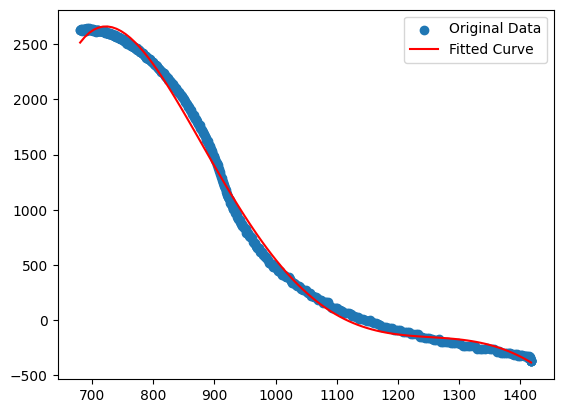

In [184]:
nonlinear_model = lambda x, a_0,a_1,a_2,a_3,a_4,a_5: - a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2 + a_1 * x + a_0

# Initial guess for parameters a and b
initial_guess = [1, -10]

# Use curve_fit to perform non-linear regression
#params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min, small_camera_data, p0=initial_guess)
params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min[870:1350], small_camera_data[870:1350])

# Extract the parameters
a_0,a_1,a_2,a_3,a_4,a_5 = params

# Print the results
print(f'Parameter a_0: {a_0}')
print(f'Parameter a_1: {a_1}')
print(f'Parameter a_2: {a_2}')
print(f'Parameter a_3: {a_3}')
print(f'Parameter a_4: {a_4}')
print(f'Parameter a_5: {a_5}')

# Plot the original data and the fitted curve
x_fit = np.linspace(min(T_couple1_10_cm_min[870:1350]), max(T_couple1_10_cm_min[870:1350]), 100)
y_fit = nonlinear_model(x_fit, a_0,a_1,a_2,a_3,a_4,a_5)

plt.scatter(T_couple1_10_cm_min[870:1350], small_camera_data[870:1350], label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.show()

Parameter a_0: -715.9051964865514
Parameter a_1: 0.711049737119097
Parameter a_2: -0.0012595544094988343
Parameter a_3: 1.5964860545378516e-06
Parameter a_4: -1.1455676714184607e-09
Parameter a_5: -3.3706858415634395e-13


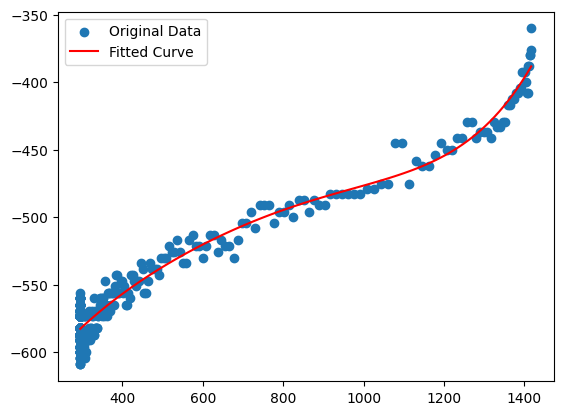

In [185]:
nonlinear_model = lambda x, a_0,a_1,a_2,a_3,a_4,a_5: - a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2 + a_1 * x + a_0

# Initial guess for parameters a and b
initial_guess = [1, -10]

# Use curve_fit to perform non-linear regression
#params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min, small_camera_data, p0=initial_guess)
params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min[:870], small_camera_data[:870])

# Extract the parameters
a_0,a_1,a_2,a_3,a_4,a_5 = params

# Print the results
print(f'Parameter a_0: {a_0}')
print(f'Parameter a_1: {a_1}')
print(f'Parameter a_2: {a_2}')
print(f'Parameter a_3: {a_3}')
print(f'Parameter a_4: {a_4}')
print(f'Parameter a_5: {a_5}')

# Plot the original data and the fitted curve
x_fit = np.linspace(min(T_couple1_10_cm_min[:870]), max(T_couple1_10_cm_min[:870]), 100)
y_fit = nonlinear_model(x_fit, a_0,a_1,a_2,a_3,a_4,a_5)

plt.scatter(T_couple1_10_cm_min[:870], small_camera_data[:870], label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.show()

### 3.3 Synchronization of the thermal camera and the thermocouple data
1. The frame rate of the thermocouple and the thermal camera are different in this experiment.
   - The frame rate of the thermal camera can be changed. Have not asked yet about the thermocouple.
2. The start time of data recording between the thermocouple and the thermal camera are not synchronous.

We will fix this before being able to compare the two data.

### 3.3.1 Maximum values achieved in synchrony
We will assume that when the left thermocouple measured the maximum temperature, the thermal camera also measured the maximum temperature around the left thermocouple in the same frame.
- This means we are neglecting the time taken to transfer heat between a few pixels in the time scale of one frame of the thermal camera.
- We need to do this for both experiments, around each thermocouple.

#### Assumption: 
##### Thermocouple 1 corresponds to the Left one in thermal camera image
##### and Thermocouple 2 corresponds to the Right one in the thermal camera image
##### for both experiments

#### 1. Experiment with 10 cm min-1 data

#### 1.a LEFT thermocouple

In [186]:
print(np.argmax(Cam_data_10_cm_min_Left_tc_Right_px_mean))

print(np.argmax(Cam_data_10_cm_min_Left_tc_Left_px_mean))

print(np.argmax(Cam_data_10_cm_min_Left_tc_Below_px_mean))

print(np.argmax(T_couple1_10_cm_min))

2213
2250
2182
871


### Frames where maximum value is attained
1. Pixels to the right of the thermocouple wires: Frame 2213
2. Pixels to the left of the thermocouple wires: Frame 2250
3. Mean of the above two frames: (2213+2250)/2 = 2231 or 2232,
   Let's try 2231
4. Thermocouple 1 data: 871

Let's try to synchronize frame 871 of thermocouple 1 data with frame 2231 of the data of the pixels to the left of the thermocouple.

**WARNING: The fist frame is labelled as frame 0!**

In [187]:
# The number of frames per second of the thermal camera data
cam_FPS = 27 # Mr. Jurke said in email on Tuesday, 12. December 2023 20:50 CET
# The number of frames per second of the thermocouple data
TC_FPS = 10 # Based on time skip 0.1 in the thermocouple data when read and viewed in a pandas dataframe in section 3.1
# Each time we skip the thermocouple data by 1 frame, we need to skip the thermal camera data by this many frames
cam_TC_frame_rate_ratio = cam_FPS/TC_FPS
# Take the integer 
cam_TC_frame_rate_ratio_int = int(cam_TC_frame_rate_ratio)
# This is the accumulated sum of (cam_TC_frame_rate_ratio  - cam_TC_frame_rate_ratio_int) ...
# If this value gets bigger than 1, we can skip 1 extra frame, and set it again to zero
Extra_frame = 0.0

# Create an empty list to hold the synchronized data
Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10 = []
Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10 = []
Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10 = []

# Create and empty list to hold the frame numbers that were selected for the thermal camera data during synchronization
Cam_data_10L_sync_frames = []

# The synchronized frame of the thermocouple: TC
zero_frame_TC = 871
# The synchronized frame of the thermal camera: cam
zero_frame_cam = 2231
# Append the value in the frame zero_frame_cam, i.e. 2231
Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10.append(Cam_data_10_cm_min_Left_tc_Left_px_mean[zero_frame_cam])
Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10.append(Cam_data_10_cm_min_Left_tc_Right_px_mean[zero_frame_cam])
Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10.append(Cam_data_10_cm_min_Left_tc_Below_px_mean[zero_frame_cam])

# Append the frame number zero_frame_cam to the list of selected frames
Cam_data_10L_sync_frames.append(zero_frame_cam)

# Skip the ratio many frames and set it as the first value for the current_frame_cam to be processed in the following for loop.
current_frame_cam = zero_frame_cam - cam_TC_frame_rate_ratio_int

# For all frames of the thermocouple before the frame zero_frame_TC, i.e. 871, in reverse order until and including the FRAME 0
for current_frame_TC in range(zero_frame_TC-1, -1, -1):

    # Prepend the current frame number to the list of selected frames
    Cam_data_10L_sync_frames = np.insert(Cam_data_10L_sync_frames, 0, current_frame_cam)
    
    # Prepend the value of the current frame of the camera to the synchronized list
    Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10 = np.insert(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10, 0, Cam_data_10_cm_min_Left_tc_Left_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10 = np.insert(Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10, 0, Cam_data_10_cm_min_Left_tc_Right_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10 = np.insert(Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10, 0, Cam_data_10_cm_min_Left_tc_Below_px_mean[current_frame_cam])
    
    # Skip down by ratio many frames for the thermal camer, for the next iteration of the loop
    current_frame_cam = current_frame_cam - cam_TC_frame_rate_ratio_int

    # Add the extra bit of the frame that could not be used because of integer requirements
    Extra_frame = Extra_frame + cam_TC_frame_rate_ratio - cam_TC_frame_rate_ratio_int

    # If we can use one frame
    if Extra_frame>= 1:
        # Skip down by 1 more frame
        current_frame_cam = current_frame_cam - 1
        # Record that we used up 1 extra frame
        Extra_frame = Extra_frame - 1    

    # Stop before the value for current_frame_cam becomes negative
    if current_frame_cam<0:
        break
print('Last unprocessed thermal camera frame number')
print(current_frame_cam)

Last unprocessed thermal camera frame number
-1


In [188]:
print(np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10)[0])
print(np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10)[0])
print(np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10)[0])

827
827
827


**We were able to insert 827 frames into** Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10 **before the time duration we had for 871 frames ran out.** This means there is some extra time in the beginning when the thermocouples are truned on but the thermal camera is not.

**So, we need to discard the 871-827 = 44 many frame at the beginning of** T_couple1_10_cm_min

In [189]:
# Ignore {0, 1, ..., 43} = 44 many frames in the beginning and start at the 45th (44+ frame zero)
T_couple1_10_cm_min_SYNC_cam_10LL = T_couple1_10_cm_min[44:]
# LL means Left thermocouple, Left pixels, and 10 means 10 cm min-1, for the thermal camera that this thermocouple data is synchronized with

In [190]:
np.shape(T_couple1_10_cm_min_SYNC_cam_10LL)[0]

2956

**Now we need to do similar synchronization after the frame 871 for thermocouple and frame 2231 for the thermal camera**

In [191]:
# WARNING: Don't run this multiple times,
# RUN the previous synchronization cell too if you want to run this again
# Otherwise things will be added multiple times

# Let's define an extra frame variable again
Extra_frame = 0.0

# The synchronized frame of the thermocouple: TC
zero_frame_TC = 871
# The synchronized frame of the thermal camera: cam
zero_frame_cam = 2231

# Skip the ratio many frames and set it as the first value for the current_frame_cam to be processed in the following for loop.
current_frame_cam = zero_frame_cam + cam_TC_frame_rate_ratio_int
# cam_TC_frame_rate_ratio_int is already defined in the previous step of synchronization, we will use the same

# For all frames of the thermocouple after the frame zero_frame_TC, i.e. 871, until and including the last frame
for current_frame_TC in range(zero_frame_TC+1, np.shape(T_couple1_10_cm_min)[0]+1, 1):

    # Append the current frame number, zero_frame_cam to the list of selected frames during synchronization
    Cam_data_10L_sync_frames = np.append(Cam_data_10L_sync_frames, current_frame_cam)
    
    # Append the value of the current frame of the camera to the synchronized list
    Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10 = np.append(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10, Cam_data_10_cm_min_Left_tc_Left_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10 = np.append(Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10, Cam_data_10_cm_min_Left_tc_Right_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10 = np.append(Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10, Cam_data_10_cm_min_Left_tc_Below_px_mean[current_frame_cam])
    
    
    # Skip up by ratio many frames for the thermal camer, for the next iteration of the loop
    current_frame_cam = current_frame_cam + cam_TC_frame_rate_ratio_int

    # Add the extra bit of the frame that could not be used because of integer requirements
    Extra_frame = Extra_frame + cam_TC_frame_rate_ratio - cam_TC_frame_rate_ratio_int

    # If we can use one frame
    if Extra_frame>= 1:
        # Skip up by 1 more frame
        current_frame_cam = current_frame_cam + 1
        # Record that we used up 1 extra frame
        Extra_frame = Extra_frame - 1    

    # Stop before the value for current_frame_cam becomes greater than the number of frames the thermal camera data has
    if current_frame_cam>np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean)[0]-1:
        break
print('Last unprocessed thermal camera frame number')
print(current_frame_cam)
print('Total frames in unprocessed thermal camera data')
print(np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean)[0])

Last unprocessed thermal camera frame number
7981
Total frames in unprocessed thermal camera data
8189


In [192]:
print('Synchronized thermal camera data')
print(np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10)[0])
print('Synchronized thermocouple data')
print(np.shape(T_couple1_10_cm_min_SYNC_cam_10LL)[0])
print('UNsynchronized thermocouple data')
print(np.shape(T_couple1_10_cm_min)[0])

Synchronized thermal camera data
2956
Synchronized thermocouple data
2956
UNsynchronized thermocouple data
3000


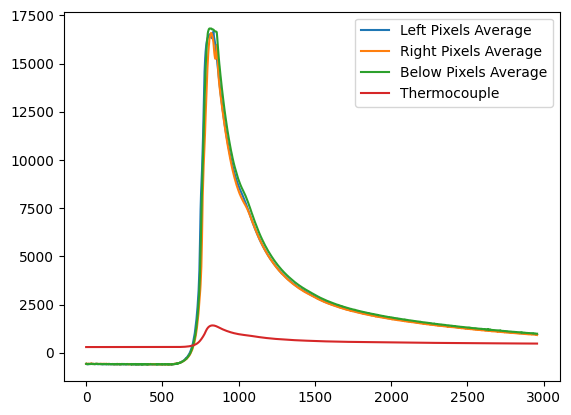

In [193]:
# Let's see what the values look like
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10)[0], np.shape(Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10)[0]),Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10, label='Left Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10)[0], np.shape(Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10)[0]),Cam_data_10_cm_min_Left_tc_Right_px_mean_SYNC_TC1_10, label='Right Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10)[0], np.shape(Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10)[0]),Cam_data_10_cm_min_Left_tc_Below_px_mean_SYNC_TC1_10, label='Below Pixels Average')

plt.plot(np.linspace(0,np.shape(T_couple1_10_cm_min_SYNC_cam_10LL)[0], np.shape(T_couple1_10_cm_min_SYNC_cam_10LL)[0]),T_couple1_10_cm_min_SYNC_cam_10LL, label='Thermocouple')
plt.legend()

In [194]:
# These are the selected frames
Cam_data_10L_sync_frames

array([   2,    5,    7, ..., 7973, 7975, 7978])

### We just really need to record the frames that we select. Then we can pick these frames from the thermocouple data, later too.

Parameter a_0: -1161.494517161929
Parameter a_1: 1.5979509435286154
Parameter a_2: -0.031492331039712725
Parameter a_3: 0.0001506182789075456
Parameter a_4: -1.481069883821652e-07
Parameter a_5: 4.3274680339226895e-11


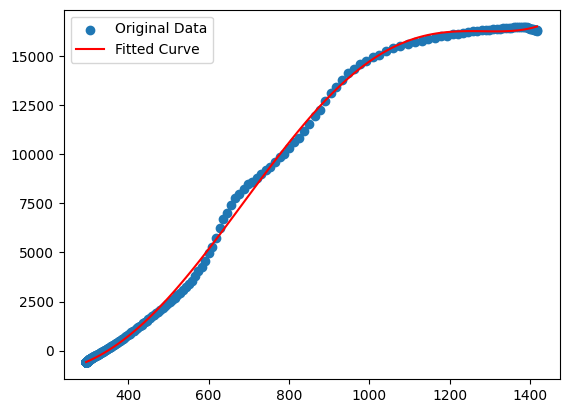

In [195]:
nonlinear_model = lambda x, a_0,a_1,a_2,a_3,a_4,a_5: a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2 + a_1 * x + a_0

# Initial guess for parameters a and b
#initial_guess = [1, -10]

# Use curve_fit to perform non-linear regression
#params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min, small_camera_data, p0=initial_guess)
params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min_SYNC_cam_10LL[:827], Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10[:827])

# Extract the parameters
a_0,a_1,a_2,a_3,a_4,a_5 = params

# Print the results
print(f'Parameter a_0: {a_0}')
print(f'Parameter a_1: {a_1}')
print(f'Parameter a_2: {a_2}')
print(f'Parameter a_3: {a_3}')
print(f'Parameter a_4: {a_4}')
print(f'Parameter a_5: {a_5}')

# Plot the original data and the fitted curve
x_fit = np.linspace(min(T_couple1_10_cm_min_SYNC_cam_10LL[:827]), max(T_couple1_10_cm_min_SYNC_cam_10LL[:827]), 100)
y_fit = nonlinear_model(x_fit, a_0,a_1,a_2,a_3,a_4,a_5)

plt.scatter(T_couple1_10_cm_min_SYNC_cam_10LL[:827], Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10[:827], label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.show()

Parameter a_0: -21569.068692439527
Parameter a_1: 119.50187991731931
Parameter a_2: -0.2722263290034538
Parameter a_3: 0.00033806222085805925
Parameter a_4: -2.0039218536953352e-07
Parameter a_5: 4.576422031873621e-11


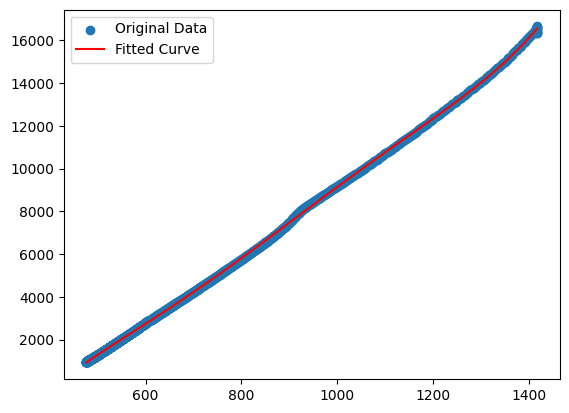

In [196]:
nonlinear_model = lambda x, a_0,a_1,a_2,a_3,a_4,a_5: a_5 * x**5 + a_4 * x**4 + a_3 * x**3 + a_2 * x**2 + a_1 * x + a_0

# Initial guess for parameters a and b
#initial_guess = [1, -10]

# Use curve_fit to perform non-linear regression
#params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min, small_camera_data, p0=initial_guess)
params, covariance = sp.optimize.curve_fit(nonlinear_model, T_couple1_10_cm_min_SYNC_cam_10LL[827:], Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10[827:])

# Extract the parameters
a_0,a_1,a_2,a_3,a_4,a_5 = params

# Print the results
print(f'Parameter a_0: {a_0}')
print(f'Parameter a_1: {a_1}')
print(f'Parameter a_2: {a_2}')
print(f'Parameter a_3: {a_3}')
print(f'Parameter a_4: {a_4}')
print(f'Parameter a_5: {a_5}')

# Plot the original data and the fitted curve
x_fit = np.linspace(min(T_couple1_10_cm_min_SYNC_cam_10LL[827:]), max(T_couple1_10_cm_min_SYNC_cam_10LL[827:]), 100)
y_fit = nonlinear_model(x_fit, a_0,a_1,a_2,a_3,a_4,a_5)

plt.scatter(T_couple1_10_cm_min_SYNC_cam_10LL[827:], Cam_data_10_cm_min_Left_tc_Left_px_mean_SYNC_TC1_10[827:], label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.show()

#### 1.b RIGHT thermocouple

Let's make two synchronizations for the RIGHT thermocouple.

### i. Just like for the LEFT thermocouple, we synchronize the maximum value attaining frame of the thermocouple 

### with the average of the maximum value attaining frames for the left and the right pixels 

In [197]:
print(np.argmax(Cam_data_10_cm_min_Right_tc_Right_px_mean))

print(np.argmax(Cam_data_10_cm_min_Right_tc_Left_px_mean))

print(np.argmax(Cam_data_10_cm_min_Right_tc_Below_px_mean))

print(np.argmax(T_couple2_10_cm_min))

3703
3683
3695
1444


### Frames where maximum value is attained
1. Pixels to the right of the thermocouple wires: Frame 3703
2. Pixels to the left of the thermocouple wires: Frame 3683
3. Mean of the above two frames: (3703+3683)/2 = 3693,
4. Thermocouple 2 data: 1444

Let's try to synchronize frame 1444 of thermocouple 2 data with frame 3693 of the data of the pixels to the left of the thermocouple.

**WARNING: The fist frame is labelled as frame 0!**

In [198]:
# The number of frames per second of the thermal camera data
cam_FPS = 27 # Mr. Jurke said in email on Tuesday, 12. December 2023 20:50 CET
# The number of frames per second of the thermocouple data
TC_FPS = 10 # Based on time skip 0.1 in the thermocouple data when read and viewed in a pandas dataframe in section 3.1
# Each time we skip the thermocouple data by 1 frame, we need to skip the thermal camera data by this many frames
cam_TC_frame_rate_ratio = cam_FPS/TC_FPS
# Take the integer 
cam_TC_frame_rate_ratio_int = int(cam_TC_frame_rate_ratio)
# This is the accumulated sum of (cam_TC_frame_rate_ratio  - cam_TC_frame_rate_ratio_int) ...
# If this value gets bigger than 1, we can skip 1 extra frame, and set it again to zero
Extra_frame = 0.0

# Create an empty list to hold the synchronized data
Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10 = []
Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10 = []
Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10 = []

# Create and empty list to hold the frame numbers that were selected for the thermal camera data during synchronization
Cam_data_10R_sync_frames = []

# The synchronized frame of the thermocouple: TC
zero_frame_TC = 1444
# The synchronized frame of the thermal camera: cam
zero_frame_cam = 3693
# Append the value in the frame zero_frame_cam, i.e. 3693
Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10.append(Cam_data_10_cm_min_Right_tc_Left_px_mean[zero_frame_cam])
Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10.append(Cam_data_10_cm_min_Right_tc_Right_px_mean[zero_frame_cam])
Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10.append(Cam_data_10_cm_min_Right_tc_Below_px_mean[zero_frame_cam])

# Append the frame number zero_frame_cam to the list of selected frames
Cam_data_10R_sync_frames.append(zero_frame_cam)

# Skip the ratio many frames and set it as the first value for the current_frame_cam to be processed in the following for loop.
current_frame_cam = zero_frame_cam - cam_TC_frame_rate_ratio_int

# For all frames of the thermocouple before the frame zero_frame_TC, i.e. 871, in reverse order until and including the FRAME 0
for current_frame_TC in range(zero_frame_TC-1, -1, -1):

    # Prepend the current frame number to the list of selected frames
    Cam_data_10R_sync_frames = np.insert(Cam_data_10R_sync_frames, 0, current_frame_cam)
    
    # Prepend the value of the current frame of the camera to the synchronized list
    Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10 = np.insert(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10, 0, Cam_data_10_cm_min_Right_tc_Left_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10 = np.insert(Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10, 0, Cam_data_10_cm_min_Right_tc_Right_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10 = np.insert(Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10, 0, Cam_data_10_cm_min_Right_tc_Below_px_mean[current_frame_cam])
    
    # Skip down by ratio many frames for the thermal camer, for the next iteration of the loop
    current_frame_cam = current_frame_cam - cam_TC_frame_rate_ratio_int

    # Add the extra bit of the frame that could not be used because of integer requirements
    Extra_frame = Extra_frame + cam_TC_frame_rate_ratio - cam_TC_frame_rate_ratio_int

    # If we can use one frame
    if Extra_frame>= 1:
        # Skip down by 1 more frame
        current_frame_cam = current_frame_cam - 1
        # Record that we used up 1 extra frame
        Extra_frame = Extra_frame - 1    

    # Stop before the value for current_frame_cam becomes negative
    if current_frame_cam<0:
        break
print('Last unprocessed thermal camera frame number')
print(current_frame_cam)

Last unprocessed thermal camera frame number
-2


In [199]:
print(np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10)[0])
print(np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10)[0])
print(np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10)[0])

1369
1369
1369


**We were able to insert 1369 frames into** Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10 **before the time duration we had for 1444 frames ran out.** This means there is some extra time in the beginning when the thermocouples are truned on but the thermal camera is not.

**So, we need to discard the 1444 - 1369 = 75 many frames at the beginning of** T_couple2_10_cm_min

**WARNING: This is different from 44 many frames that we had to discard when synchronizing the left thermocouple and thermal camera peaks**
This is about (75 - 44)/(27 fps) = 1.148 seconds of difference in synchronization which is quite reasonable.

In [215]:
# Ignore {0, 1, ..., 74} = 75 many frames in the beginning and start at the 76th (75 + frame zero)
T_couple2_10_cm_min_SYNC_cam_10RL = T_couple1_10_cm_min[75:]
# RL means Right thermocouple, Left pixels, and 10 means 10 cm min-1, for the thermal camera that this thermocouple data is synchronized with

In [216]:
np.shape(T_couple2_10_cm_min_SYNC_cam_10RL)[0]

2925

**Now we need to do similar synchronization after the frame 1444 for thermocouple and frame 3693 for the thermal camera**

In [217]:
# WARNING: Don't run this multiple times,
# RUN the previous synchronization cell too if you want to run this again
# Otherwise things will be added multiple times

# Let's define an extra frame variable again
Extra_frame = 0.0

# The synchronized frame of the thermocouple: TC
zero_frame_TC = 1444
# The synchronized frame of the thermal camera: cam
zero_frame_cam = 3693

# Skip the ratio many frames and set it as the first value for the current_frame_cam to be processed in the following for loop.
current_frame_cam = zero_frame_cam + cam_TC_frame_rate_ratio_int
# cam_TC_frame_rate_ratio_int is already defined in the previous step of synchronization, we will use the same

# For all frames of the thermocouple after the frame zero_frame_TC, i.e. 871, until and including the last frame
for current_frame_TC in range(zero_frame_TC+1, np.shape(T_couple1_10_cm_min)[0]+1, 1):

    # Append the current frame number, zero_frame_cam to the list of selected frames during synchronization
    Cam_data_10R_sync_frames = np.append(Cam_data_10R_sync_frames, current_frame_cam)
    
    # Append the value of the current frame of the camera to the synchronized list
    Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10 = np.append(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10, Cam_data_10_cm_min_Right_tc_Left_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10 = np.append(Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10, Cam_data_10_cm_min_Right_tc_Right_px_mean[current_frame_cam])
    Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10 = np.append(Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10, Cam_data_10_cm_min_Right_tc_Below_px_mean[current_frame_cam])
    
    
    # Skip up by ratio many frames for the thermal camer, for the next iteration of the loop
    current_frame_cam = current_frame_cam + cam_TC_frame_rate_ratio_int

    # Add the extra bit of the frame that could not be used because of integer requirements
    Extra_frame = Extra_frame + cam_TC_frame_rate_ratio - cam_TC_frame_rate_ratio_int

    # If we can use one frame
    if Extra_frame>= 1:
        # Skip up by 1 more frame
        current_frame_cam = current_frame_cam + 1
        # Record that we used up 1 extra frame
        Extra_frame = Extra_frame - 1    

    # Stop before the value for current_frame_cam becomes greater than the number of frames the thermal camera data has
    if current_frame_cam>np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean)[0]-1:
        break
print('Last unprocessed thermal camera frame number')
print(current_frame_cam)
print('Total frames in unprocessed thermal camera data')
print(np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean)[0])

Last unprocessed thermal camera frame number
7896
Total frames in unprocessed thermal camera data
8189


In [218]:
print('Synchronized thermal camera data')
print(np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10)[0])
print('Synchronized thermocouple data')
print(np.shape(T_couple2_10_cm_min_SYNC_cam_10RL)[0])
print('UNsynchronized thermocouple data')
print(np.shape(T_couple2_10_cm_min)[0])

Synchronized thermal camera data
2925
Synchronized thermocouple data
2925
UNsynchronized thermocouple data
3000


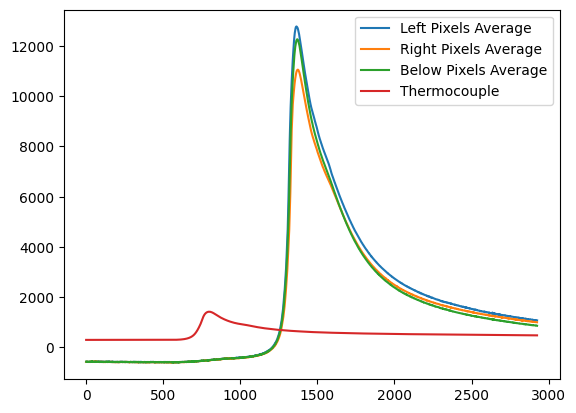

In [220]:
# Let's see what the values look like
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10)[0], np.shape(Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10)[0]),Cam_data_10_cm_min_Right_tc_Left_px_mean_SYNC_TC2_10, label='Left Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10)[0], np.shape(Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10)[0]),Cam_data_10_cm_min_Right_tc_Right_px_mean_SYNC_TC2_10, label='Right Pixels Average')
plt.plot(np.linspace(0,np.shape(Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10)[0], np.shape(Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10)[0]),Cam_data_10_cm_min_Right_tc_Below_px_mean_SYNC_TC2_10, label='Below Pixels Average')

plt.plot(np.linspace(0,np.shape(T_couple2_10_cm_min_SYNC_cam_10RL)[0], np.shape(T_couple2_10_cm_min_SYNC_cam_10RL)[0]),T_couple2_10_cm_min_SYNC_cam_10RL, label='Thermocouple')
plt.legend()

In [222]:
# These are the selected frames
Cam_data_10R_sync_frames

array([   1,    3,    6, ..., 7888, 7890, 7893])

### ii. We use the synchronization set by the synchronization of the left frame

### iii. Let's compare the two synchronizations
Let's first look at the frames selected.

In [223]:
print(np.shape(Cam_data_10L_sync_frames)[0])
print(np.shape(Cam_data_10R_sync_frames)[0])

2956
2925


In [235]:
max_size = max(np.max(Cam_data_10L_sync_frames), np.max(Cam_data_10R_sync_frames))
full_data = np.linspace(0, max_size, max_size)
image_data_matrix = np.zeros((max_size, max_size))
num_L_only = 0
num_R_only = 0
num_both = 0
for a_frame in range(max_size):
    if a_frame in Cam_data_10L_sync_frames:
        if a_frame in Cam_data_10R_sync_frames:
            # In both left and right
            image_data_matrix[a_frame][a_frame] = 0
            num_both += 1
        else:
            # In Left only
            image_data_matrix[a_frame][a_frame] = 1
            num_L_only += 1
    else:
        if a_frame in Cam_data_10R_sync_frames:
            # In right only
            image_data_matrix[a_frame][a_frame] = 2
            num_R_only
        else:
            # In neither
            image_data_matrix[a_frame][a_frame] = 3

In [236]:
print(num_L_only)
print(num_R_only)
print(num_both)

2898
0
57


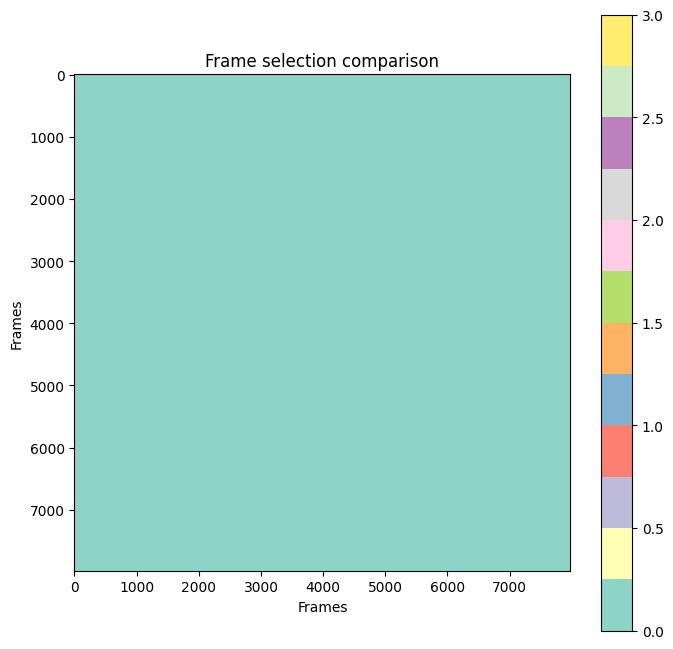

In [233]:
# Set the size of the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
im = ax.imshow(image_data_matrix, cmap='Set3')

# Add colorbar
cbar = plt.colorbar(im)

# Add labels and title
ax.set_xlabel('Frames')
ax.set_ylabel('Frames')
ax.set_title('Frame selection comparison')

# Show the plot
plt.show()

#### 2. Experiment with 20 cm min-1 data

#### 2.a LEFT thermocouple

In [200]:
print(np.argmax(Cam_data_20_cm_min_Left_tc_Right_px_mean))

print(np.argmax(Cam_data_20_cm_min_Left_tc_Left_px_mean))

print(np.argmax(Cam_data_20_cm_min_Left_tc_Below_px_mean))

print(np.argmax(T_couple1_20_cm_min))

1573
1575
1578
499


### Frames where maximum value is attained
1. Pixels to the right of the thermocouple wires: Frame 1573
2. Pixels to the left of the thermocouple wires: Frame 1575
3. Mean of the above two frames: (1573+1575)/2 = 1574,
4. Thermocouple 1 data: 499

Let's try to synchronize frame 499 of thermocouple 1 data with frame 1574 of the data of the pixels to the left of the thermocouple.

**WARNING: The fist frame is labelled as frame 0!**

In [237]:
# The number of frames per second of the thermal camera data
cam_FPS = 27 # Mr. Jurke said in email on Tuesday, 12. December 2023 20:50 CET
# The number of frames per second of the thermocouple data
TC_FPS = 10 # Based on time skip 0.1 in the thermocouple data when read and viewed in a pandas dataframe in section 3.1
# Each time we skip the thermocouple data by 1 frame, we need to skip the thermal camera data by this many frames
cam_TC_frame_rate_ratio = cam_FPS/TC_FPS
# Take the integer 
cam_TC_frame_rate_ratio_int = int(cam_TC_frame_rate_ratio)
# This is the accumulated sum of (cam_TC_frame_rate_ratio  - cam_TC_frame_rate_ratio_int) ...
# If this value gets bigger than 1, we can skip 1 extra frame, and set it again to zero
Extra_frame = 0.0

# Create an empty list to hold the synchronized data
Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20 = []
Cam_data_20_cm_min_Left_tc_Right_px_mean_SYNC_TC1_20 = []
Cam_data_20_cm_min_Left_tc_Below_px_mean_SYNC_TC1_20 = []

# Create and empty list to hold the frame numbers that were selected for the thermal camera data during synchronization
Cam_data_20L_sync_frames = []

# The synchronized frame of the thermocouple: TC
zero_frame_TC = 499
# The synchronized frame of the thermal camera: cam
zero_frame_cam = 1574
# Append the value in the frame zero_frame_cam, i.e. 2231
Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20.append(Cam_data_20_cm_min_Left_tc_Left_px_mean[zero_frame_cam])
Cam_data_20_cm_min_Left_tc_Right_px_mean_SYNC_TC1_20.append(Cam_data_20_cm_min_Left_tc_Right_px_mean[zero_frame_cam])
Cam_data_20_cm_min_Left_tc_Below_px_mean_SYNC_TC1_20.append(Cam_data_20_cm_min_Left_tc_Below_px_mean[zero_frame_cam])

# Append the frame number zero_frame_cam to the list of selected frames
Cam_data_20L_sync_frames.append(zero_frame_cam)

# Skip the ratio many frames and set it as the first value for the current_frame_cam to be processed in the following for loop.
current_frame_cam = zero_frame_cam - cam_TC_frame_rate_ratio_int

# For all frames of the thermocouple before the frame zero_frame_TC, i.e. 871, in reverse order until and including the FRAME 0
for current_frame_TC in range(zero_frame_TC-1, -1, -1):

    # Prepend the current frame number to the list of selected frames
    Cam_data_20L_sync_frames = np.insert(Cam_data_20L_sync_frames, 0, current_frame_cam)
    
    # Prepend the value of the current frame of the camera to the synchronized list
    Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20 = np.insert(Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20, 0, Cam_data_20_cm_min_Left_tc_Left_px_mean[current_frame_cam])
    Cam_data_20_cm_min_Left_tc_Right_px_mean_SYNC_TC1_20 = np.insert(Cam_data_20_cm_min_Left_tc_Right_px_mean_SYNC_TC1_20, 0, Cam_data_20_cm_min_Left_tc_Right_px_mean[current_frame_cam])
    Cam_data_20_cm_min_Left_tc_Below_px_mean_SYNC_TC1_20 = np.insert(Cam_data_20_cm_min_Left_tc_Below_px_mean_SYNC_TC1_20, 0, Cam_data_20_cm_min_Left_tc_Below_px_mean[current_frame_cam])
    
    # Skip down by ratio many frames for the thermal camer, for the next iteration of the loop
    current_frame_cam = current_frame_cam - cam_TC_frame_rate_ratio_int

    # Add the extra bit of the frame that could not be used because of integer requirements
    Extra_frame = Extra_frame + cam_TC_frame_rate_ratio - cam_TC_frame_rate_ratio_int

    # If we can use one frame
    if Extra_frame>= 1:
        # Skip down by 1 more frame
        current_frame_cam = current_frame_cam - 1
        # Record that we used up 1 extra frame
        Extra_frame = Extra_frame - 1    

    # Stop before the value for current_frame_cam becomes negative
    if current_frame_cam<0:
        break
print('Last unprocessed thermal camera frame number')
print(current_frame_cam)

Last unprocessed thermal camera frame number
225


In [238]:
print(np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20)[0])
print(np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20)[0])
print(np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20)[0])

500
500
500


**We were able to insert 500 frames into** Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20 **before we were done will deciding on all 1574 frames of the thermal camera.** The last unprocessed thermal camera frame number is 225. 

This means the frames before the frame 225 in the thermal camera data correspond to the time when the thercouples were not turned on but the thermal camera was. This data is automatically discarded as we did not add it to the synchronized list.

In [241]:
# Unlike for 10 cm min-1 experiment, here we do not discard any frames
T_couple1_20_cm_min_SYNC_cam_20LL = T_couple1_20_cm_min
# LL means Left thermocouple, Left pixels, and 20 means 20 cm min-1, for the thermal camera that this thermocouple data is synchronized with

**Now we need to do similar synchronization after the frame 871 for thermocouple and frame 2231 for the thermal camera**

In [239]:
# WARNING: Don't run this multiple times,
# RUN the previous synchronization cell too if you want to run this again
# Otherwise things will be added multiple times

# Let's define an extra frame variable again
Extra_frame = 0.0

# The synchronized frame of the thermocouple: TC
zero_frame_TC = 499
# The synchronized frame of the thermal camera: cam
zero_frame_cam = 1574

# Skip the ratio many frames and set it as the first value for the current_frame_cam to be processed in the following for loop.
current_frame_cam = zero_frame_cam + cam_TC_frame_rate_ratio_int
# cam_TC_frame_rate_ratio_int is already defined in the previous step of synchronization, we will use the same

# For all frames of the thermocouple after the frame zero_frame_TC, i.e. 871, until and including the last frame
for current_frame_TC in range(zero_frame_TC+1, np.shape(T_couple1_20_cm_min)[0]+1, 1):

    # Append the current frame number, zero_frame_cam to the list of selected frames during synchronization
    Cam_data_20L_sync_frames = np.append(Cam_data_20L_sync_frames, current_frame_cam)
    
    # Append the value of the current frame of the camera to the synchronized list
    Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20 = np.append(Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20, Cam_data_20_cm_min_Left_tc_Left_px_mean[current_frame_cam])
    Cam_data_20_cm_min_Left_tc_Right_px_mean_SYNC_TC1_20 = np.append(Cam_data_20_cm_min_Left_tc_Right_px_mean_SYNC_TC1_20, Cam_data_20_cm_min_Left_tc_Right_px_mean[current_frame_cam])
    Cam_data_20_cm_min_Left_tc_Below_px_mean_SYNC_TC1_20 = np.append(Cam_data_20_cm_min_Left_tc_Below_px_mean_SYNC_TC1_20, Cam_data_20_cm_min_Left_tc_Below_px_mean[current_frame_cam])
    
    
    # Skip up by ratio many frames for the thermal camer, for the next iteration of the loop
    current_frame_cam = current_frame_cam + cam_TC_frame_rate_ratio_int

    # Add the extra bit of the frame that could not be used because of integer requirements
    Extra_frame = Extra_frame + cam_TC_frame_rate_ratio - cam_TC_frame_rate_ratio_int

    # If we can use one frame
    if Extra_frame>= 1:
        # Skip up by 1 more frame
        current_frame_cam = current_frame_cam + 1
        # Record that we used up 1 extra frame
        Extra_frame = Extra_frame - 1    

    # Stop before the value for current_frame_cam becomes greater than the number of frames the thermal camera data has
    if current_frame_cam>np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean)[0]-1:
        break
print('Last unprocessed thermal camera frame number')
print(current_frame_cam)
print('Total frames in unprocessed thermal camera data')
print(np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean)[0])

Last unprocessed thermal camera frame number
3236
Total frames in unprocessed thermal camera data
3236


### I think this means all frames were processes

In [242]:
print('Synchronized thermal camera data')
print(np.shape(Cam_data_20_cm_min_Left_tc_Left_px_mean_SYNC_TC1_20)[0])
print('Synchronized thermocouple data')
print(np.shape(T_couple1_20_cm_min_SYNC_cam_20LL)[0])
print('UNsynchronized thermocouple data')
print(np.shape(T_couple1_20_cm_min)[0])

Synchronized thermal camera data
1115
Synchronized thermocouple data
1145
UNsynchronized thermocouple data
1145


### Need to figure out where I did not drop the data

#### 2.b RIGHT thermocouple

In [201]:
print(np.argmax(Cam_data_20_cm_min_Right_tc_Right_px_mean))

print(np.argmax(Cam_data_20_cm_min_Right_tc_Left_px_mean))

print(np.argmax(Cam_data_20_cm_min_Right_tc_Below_px_mean))

print(np.argmax(T_couple2_20_cm_min))

2464
2438
2452
824


## 4. Emissivity Models

### 4.1 Integration with Emissivity

In [202]:
# We will first define a slight variation of the trapezoidal function that multiplies the values of ...
# the intensity of a blackbody and the emissivity, at wavelengths of interpolation x_k ...
# So that it does integration of: Blackbody intensity * emissivity
def trapezoidal_multiplier(f_s, x_0, x_N, N):
    '''
    Arguments:
    f_s : a list of functions of wavelength. The model to have in mind for now is [B_of_lambda, epsilon_of_lambda]
    x_0, x_N: The range integration, for the wavelengeths here.
    N: number of interpolation/integration points

    Retuns:
    The integration of :B_of_lambda * epsilon_of_lambda, d_wavelength 
    by using interpolated values of B_of_lambda(x_k) * epsilon_of_lambda(x_k) for x_k being the wavelengths used for integration

    Description:
    This function is a slight adjustment of the trapezoidal function.
    '''

    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    prod = 1.0
    # For each of the functions, multiply the value of the functions at x_0 together,
    # Then add that value to the sum as the trapezoidal function would do.
    for one_such_f in f_s:
        prod = prod * (one_such_f(x_0))
    sum += prod/2.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        x_k = x_0 + i * delta_x
        
        prod = 1.0
        for one_such_f in f_s:
            prod = prod * (one_such_f(x_k))
        sum += prod

    # For x_N
    prod = 1.0
    for one_such_f in f_s:
        prod = prod * (one_such_f(x_N))
    sum += prod/2.0
    
    sum = sum * delta_x
    
    return sum

In [203]:
# Let's see if it works

# Define a dummy expression for emissivity as the product of the wavelength and the temperature
term_of_T_couple_then_lambda = lambda T_couple: (lambda lambda_: lambda_ * T_couple)
# Define some temperatures
T_couple_s = [400, 500, 600, 700]
# Get the intensity as functions of wavelengths at various temperatures
T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
# Define an empty list to hold the integrated intensity values
B_lambda_T_s_integrated = []

# For each of the functions of wavelengths at various temperatures
for i in range(np.size(T_couple_s_at_T)):
    # Get the emissivity at this temperature, as a function of the wavelength
    emissivity_at_T = term_of_T_couple_then_lambda(T_couple_s[i])
    # Append the expression for blackbody intensity and the emissivity to the list of functions to be multiplied
    # Both are functions of wavelength at this temperature
    functions_to_be_multiplied = [T_couple_s_at_T[i], emissivity_at_T]
    # Call the trapezoidal function and append the result of integration at this temperature to the B_lambda_T_s_integrated array
    B_lambda_T_s_integrated.append(trapezoidal_multiplier(functions_to_be_multiplied, lambda_0, lambda_1, N))

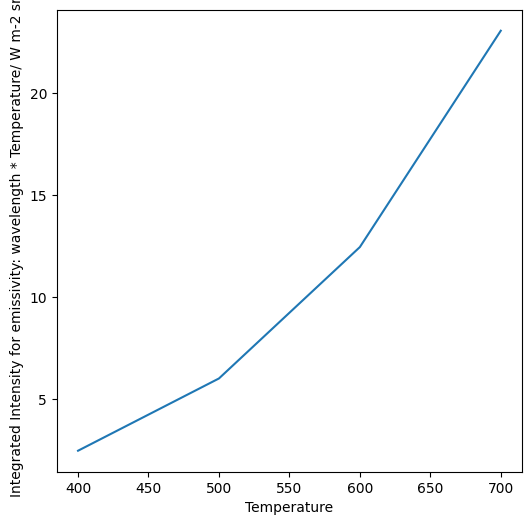

In [204]:
# Let's plot and see what it looks like
# Define the axis and figure
fig, ax = plt.subplots(figsize=(6, 6))

# Could be useful to look at log scale plots sometimes
#ax.set_xscale('log')
#ax.set_yscale('log')
# Set the limits
#ax.set_xlim([0, 10**(-4)])
# Set the labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Integrated Intensity for emissivity: wavelength * Temperature/ W m-2 sr-1') 
# Plot the intensities
ax.plot(T_couple_s, B_lambda_T_s_integrated)

In [205]:
# Let's make this into a function
def integrated_B_non_Blackbody(T_couple_s, lambda_0, lambda_1, N, emissivity_of_T_couple_then_lambda):
    '''
    Arguments:
    1. T_couple_s : This is the list of thermocouple temperature data at each frame, and is close to the directly read data  from a thermocouple
    2., 3. (lambda_0, lambda_1): The bandwidth for integration, upper and lower wavelength values
    4. N: Number of points for integration with the trapezoidal rule
    N = 1000 is reasonable for now
    5. emissivity_of_T_couple_then_lambda: is an emissivity function of Temperature that returns a function of the wavelength at that temperature
    This is theoretically an emissivity of a temperature and wavelength, where the temperature is evaluated first and then wavelength 

    Returns: 
    B_lambda_T_s_integrated: A list of The intensity at each temperature, for a non black body; since here we multiply by emissivity
    
    Description:
    This function passes in intensity at a certain temperature and the emissivity at the same temperature to the trapezoidal_multiplier ...
    function where intensity_at_T * emissivity_at_T will be integrated ...
    for each temperature in T_couple_s
    
    Just like integrated_B_blackbody function integrates the intensity using trapezoidal function
    this function integrates the intensity for a non black body which is a product of the intensity for blackbody and emissivity, using ...
    trapezoidal_multiplier function
    '''
    
    # Get the intensity as functions of wavelengths at various temperatures
    T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
    # Define an empty list to hold the integrated intensity values
    B_lambda_T_s_integrated = []
    
    # For each of the functions of wavelengths at various temperatures
    for i in range(np.size(T_couple_s_at_T)):
        # Get the emissivity at this temperature, as a function of the wavelength
        # This means evaluate the emissivity at this temperature
        emissivity_at_T = emissivity_of_T_couple_then_lambda(T_couple_s[i])
        # Append the expression for blackbody intensity and the emissivity to the list of functions to be multiplied
        # Both are functions of wavelength at this temperature
        functions_to_be_multiplied = [T_couple_s_at_T[i], emissivity_at_T]
        # Call the trapezoidal function and append the result of integration at this temperature to the B_lambda_T_s_integrated array
        B_lambda_T_s_integrated.append(trapezoidal_multiplier(functions_to_be_multiplied, lambda_0, lambda_1, N))

    return B_lambda_T_s_integrated

#### 4.1.1 A test for Integration with Emissivity
A test that we can do to check whether this is working is to compare the intensities we get from using the functions in Section 2 which are intensities for a blackbody, and using the functions in Section 4.1 but using emissivity = 1.

In [206]:
# Define emissivity = 1
Blackbody_term_of_T_couple_then_lambda = lambda T_couple: (lambda lambda_: 1)
# Define some temperatures
T_couple_s = np.linspace(100,1000,1000)
# Define the bandwidth: [400 nm, 700 nm] and the number of integration points: 1000
lambda_0 = 400 * (10**(-9))
lambda_1 = 700 * (10**(-9))
N = 1000

# Get the integrated B with emissvity = 1 using the integrated_B_non_Blackbody function in section 4.1
B_lambda_T_s_integrated_with_emissivity = integrated_B_non_Blackbody(T_couple_s, lambda_0, lambda_1, N, Blackbody_term_of_T_couple_then_lambda)
# Get the integrated B without emissivity using the integrated_B_blackbody function in section 2
B_lambda_T_s_integrated_without_emissivity = integrated_B_blackbody(T_couple_s, lambda_0, lambda_1, N)
# Get the difference of the intensities
difference_in_B_s = np.array(B_lambda_T_s_integrated_with_emissivity) - np.array(B_lambda_T_s_integrated_without_emissivity)
# Get the mean
print(f'The mean difference is: {np.mean(difference_in_B_s)}')
# Get the maximum difference
print(f'The maximum difference is: {np.max(difference_in_B_s)}')
# Get the mean of the difference divided by the mean of B_lambda_T_s_integrated_without_emissivity
print(f'The mean difference divided by the mean value using section 2 is: {np.mean(difference_in_B_s)/np.mean(B_lambda_T_s_integrated_without_emissivity)}')
# Get the maximum difference divided by the maximum of B_lambda_T_s_integrated_without_emissivity
print(f'The maximum difference divided by the maximum value using section 2is: {np.max(difference_in_B_s)/np.max(B_lambda_T_s_integrated_without_emissivity)}')

The mean difference is: 0.0
The maximum difference is: 0.0
The mean difference divided by the mean value using section 2 is: 0.0
The maximum difference divided by the maximum value using section 2is: 0.0


In [207]:
# Let's have a look that whether the first ten elements indeed they look identical
print(B_lambda_T_s_integrated_with_emissivity[:10])

[1.3322011138879443e-83, 8.424100213151713e-83, 5.1562796324785716e-82, 3.0575982983353173e-81, 1.7579815779703465e-80, 9.808094976544041e-80, 5.3140561669364147e-79, 2.798092684133329e-78, 1.432864122625011e-77, 7.140965676030899e-77]


In [208]:
print(B_lambda_T_s_integrated_without_emissivity[:10])

[1.3322011138879443e-83, 8.424100213151713e-83, 5.1562796324785716e-82, 3.0575982983353173e-81, 1.7579815779703465e-80, 9.808094976544041e-80, 5.3140561669364147e-79, 2.798092684133329e-78, 1.432864122625011e-77, 7.140965676030899e-77]


The first ten elements indeed look identical

In [209]:
# Let's look at the difference
print(difference_in_B_s[np.where(difference_in_B_s!=0)])

[]


All the differences seem to be zero

##### Things seem to be working.

### 4.2 Polynomial-like separable model for emissivity

Here we discuss models of the following kind:

Consider 
$\varepsilon = \sum_{i \in \mathbb{N}} a_i \lambda^{\displaystyle \left(\frac{m_i}{n_i}\right)} T^{\displaystyle \left(\frac{k_i}{l_i}\right)} $ where {$m,n,k,l$} $ \in \mathbb{R}$

An example may be 
$\varepsilon = a_0 + a_1 \lambda + a_2 \sqrt{\lambda T} + a_3 \left(\frac{\lambda}{T}\right)^2 + a_4 \frac{T}{\lambda} + a_5 T^2$

In such cases, we will do the following procedure.
$\displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \varepsilon(\lambda,T) d \lambda = \sum_{i} a_i \int_{\lambda_0}^{\lambda_1} B(\lambda, T) \lambda^{\displaystyle \left(\frac{m_i}{n_i}\right)} T^{\displaystyle \left(\frac{k_i}{l_i}\right)} d \lambda$

So in the above example,  
$\displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \varepsilon(\lambda,T) d \lambda = \displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \left( a_0 + a_1 \lambda + a_2 \sqrt{\lambda T} + a_3 \left(\frac{\lambda}{T}\right)^2 + a_4 \frac{T}{\lambda} + a_5 T^2 \right) d \lambda$
$= \displaystyle a_0 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) d \lambda + a_1 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \lambda d \lambda + a_2  \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \sqrt{\lambda T} d \lambda + a_3  B(\lambda, T) \int_{\lambda_0}^{\lambda_1} \left(\frac{\lambda}{T}\right)^2 d \lambda + a_4 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \frac{T}{\lambda} d \lambda + a_5 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) T^2 d \lambda $

We can solve each of the integrals using the **integrated_B_non_Blackbody** function in section 4.1.
Then we get,

integrated_B$(T_j) = \sum_{i} a_i$ integrated_B_i$(T_j)$

or in this case

integrated_B$(T_j) = a_0 $ integrated_B_0$(T_j)$ + $ a_1 $ integrated_B_1$(T_j)$ + $ a_2 $ integrated_B_2$(T_j)$ + $ a_3 $ integrated_B_3$(T_j)$ + $ a_4 $ integrated_B_4$(T_j)$ + $ a_5 $ integrated_B_5$(T_j)$

The left hand side of the equation is a value we compute based on the data from the thermal camera. 

We have not taken into account the Area and the solid angle, so we will need to multiply with those factors later, but let's say that the left hand side is representative of the quantity also obtained from the right hand side, in this case Intensity with units $W m^{-2} sr^{-1} m^{-1}$ 

We have $j$ many equations for the temperatures that we have. We use $i$ many of those equations to get the coefficients $a_i$. Then we can plug in the $a_i$ 's in the remaining $j - i$ many equations and get the difference between the left and the right hand sides. We can also solve $j$ many equations in different combinations to see which combinations give the least difference between the left and the right hand sides on the remaining $j - i$ many equations, when the values of $a_i$ are plugged in.

Let's say we have/use 1000 frames of data from the thermocouple. In the above example, we have 6 coefficients to solve for. So, we use the 6 equations to solve for the coefficients $a_0$ to $a_5$ and use the remaining 994 equations to check the error.

#### WARNING! We cannot use emissivity models of the following kind with the integrated_B_non_Blackbody function in section 4.1.
Consider

$\varepsilon =$ exp$(a_0 \lambda +a_1 \lambda^2)$ 

or 

$\displaystyle \varepsilon = \frac{1}{(a_0+a_1 \lambda)}$ 

which have been commonly used in the literature. Here

$\displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \varepsilon(\lambda,T) d \lambda = \displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) $ exp$(a_0 \lambda)$ exp$(a_1 \lambda^2) d \lambda$

Here we will need to pass in the coefficients $a_i$ into the integration. That means we have to make sums of symbolic expressions.
For example, approximation of $\int_{1}^{2}$ exp$( a_0 \lambda)$ with 3 interpolation points, would result in a sum of the form $c_0$ exp$(a_0) + c_1$ exp$(1.5 a_0) + c_2$ exp$(2 a_0)$ which with 1000 points is a really long expression. This will be the case for values at each temperature (frame). I think this might take a lot of time, but we could try it.

**One idea could be to do symbolic substitution with 10 integration points. get a rough value of coefficients.
Then plug in those coefficient into caculating the integration without symbolic substitution as above.
We can then check errors in those values and adjust the coefficients some reasonable the adjustible range and choose the values with the lowest errors.
However, we will need to build the program to integrate using symbolic substitution, for non-blackbody cases.**

This is discussed in section 4.3, but let's get back to the polynomial-like case.

#### 4.2.1 Polynomial-like separable model for emissivity dependent only on wavelength

#### 4.2.2 Polynomial-like separable model for emissivity dependent only on Temperature

#### 4.2.3 Polynomial-like separable model for emissivity dependent on wavelength and temperature

In [210]:
def integrator_with_emissivity_term_s(T_couple_s, lambda_0, lambda_1, N, Emissivity_terms_and_coefficients):
    '''
    Arguments:
    1. T_couple_s : This is the list of thermocouple temperature data at each frame, and is close to the directly read data  from a thermocouple
    2., 3. (lambda_0, lambda_1): The bandwidth for integration, upper and lower wavelength values
    4. N: Number of points for integration with the trapezoidal rule
    N = 1000 is reasonable for now
    
    5.
    Emissivity_terms_and_coefficients: For example, [(lambda, a_0,), (T, a_1), (lambda * T, a_2)]
    It is a list of tuples each of whose...
    ----first term is an anonymous function that represents a term of the emissivity function. 
    For example: lambda T_couple: (lambda lambda_: a_0 * lambda_ + a_1 * T_couple)
    ----second terms is symbolic coeffient for this term of the emissivity function.
    For example: smp.Symbol('a_0')

    Returns: The integrated intensity at each temperature, which now is a symbolic expressions of the form:
    a_0 * some number + a_1 * some number + a_2 * some number + ... + a_n * some number 
    for n many terms of the emissivity function and n many coefficients (1 for each term)

    Description:
    For a representation of an emissivity model represented by the argument: Emissivity_terms_and_coefficients,
    this function integrates each term and sums them together, 
    returning the integrated intensity at each temperature, which now is a symbolic expressions in the coefficients

    n many of these "number of Temperature points" many linear equations in n many variables {a_i}, need to be solved simultaneously
    to obtain the values of the {a_i}

    Then, a_i could be substituted in the rest of these equations.

    Selecting at which temperature points to solve for a_i will be an important decision problem,
    and we will need to solve them around important temperatures (non-room temperature points, so not the temperatures before the heating starts)
    '''

    # Define a matrix of zeros to hold the total integrated intensity at each temperature, ...
    # so the size of the list of temperatures T_couple_s
    Total_integrated_non_blackbody_intensity = np.zeros(np.size(T_couple_s))

    number_of_emissivity_terms = len(Emissivity_terms_and_coefficients)
    # For each term of the emissivity model
    for i in range(number_of_emissivity_terms):
        # Get the integrated B with emissvity using the integrated_B_non_Blackbody function in section 4.1 ...
        # for this term of the emissivity
        integrated_non_blackbody_intensity_current_term = np.array(integrated_B_non_Blackbody(T_couple_s, lambda_0, lambda_1, N, Emissivity_terms_and_coefficients[i][0]))
        # multiply the integrated intensity for the current term with the weight for the current term
        weighted_integrated_non_blackbody_intensity_current_term = Emissivity_terms_and_coefficients[i][1] * integrated_non_blackbody_intensity_current_term
        # add the current term of the integrated intensity to the total     
        Total_integrated_non_blackbody_intensity = weighted_integrated_non_blackbody_intensity_current_term + Total_integrated_non_blackbody_intensity
        print(f'{i} of {number_of_emissivity_terms} done.')
    return Total_integrated_non_blackbody_intensity 

In [211]:
# Define some emissivity terms
# Empty list to hold the emissivity terms
Emissivity_terms_and_coefficients_model_1 = []

# Constant term
emissivity_constant_term = lambda T_couple: (lambda lambda_: 1.0)
emissivity_constant_term_weight = smp.Symbol('a_0')
Emissivity_terms_and_coefficients_model_1.append((emissivity_constant_term, emissivity_constant_term_weight))

# Lambda term
emissivity_lambda_term = lambda T_couple: (lambda lambda_: lambda_)
emissivity_lambda_term_weight = smp.Symbol('a_1_l')
Emissivity_terms_and_coefficients_model_1.append((emissivity_lambda_term, emissivity_lambda_term_weight))

# T term
emissivity_T_term = lambda T_couple: (lambda lambda_: T_couple)
emissivity_T_term_weight = smp.Symbol('a_1_T')
Emissivity_terms_and_coefficients_model_1.append((emissivity_T_term, emissivity_T_term_weight))

# lambda * T term
emissivity_lambda_term = lambda T_couple: (lambda lambda_: lambda_ * T_couple)
emissivity_lambda_term_weight = smp.Symbol('a_1_lT')
Emissivity_terms_and_coefficients_model_1.append((emissivity_lambda_term, emissivity_lambda_term_weight))

# Define some temperatures
T_couple_s = np.linspace(100,1000,1000)
# Define the bandwidth: [400 nm, 700 nm] and the number of integration points: 1000
lambda_0 = 400 * (10**(-9))
lambda_1 = 700 * (10**(-9))
N = 1000

start_time = datetime.datetime.now()
# Get the integrated B with emissvity using the integrator_with_emissivity_term_s function in section 4.2.3
B_lambda_T_s_integrated_with_emissivity_terms = integrator_with_emissivity_term_s(T_couple_s, lambda_0, lambda_1, N, Emissivity_terms_and_coefficients_model_1)
end_time = datetime.datetime.now()
print(f'It took: {end_time - start_time}')

0 of 4 done.
1 of 4 done.
2 of 4 done.
3 of 4 done.
It took: 0:00:06.617523


In [212]:
# Let's see what it looks like
print(B_lambda_T_s_integrated_with_emissivity_terms)

[1.33220111388794e-83*a_0 + 1.33220111388794e-81*a_1_T + 9.27987712149521e-90*a_1_l + 9.27987712149521e-88*a_1_lT
 8.42410021315171e-83*a_0 + 8.49999300786479e-81*a_1_T + 5.8678178110567e-89*a_1_l + 5.92068103457973e-87*a_1_lT
 5.15627963247857e-82*a_0 + 5.24918557180251e-80*a_1_T + 3.59145326565523e-88*a_1_l + 3.65616413530668e-86*a_1_lT
 3.05759829833532e-81*a_0 + 3.14023609018222e-79*a_1_T + 2.12958434225556e-87*a_1_l + 2.18714067583003e-85*a_1_lT
 1.75798157797035e-80*a_0 + 1.82133226546477e-78*a_1_T + 1.22436073645838e-86*a_1_l + 1.2684818440785e-84*a_1_lT
 9.80809497654404e-80*a_0 + 1.02499010565685e-77*a_1_T + 6.83062419273721e-86*a_1_l + 7.13830996718483e-84*a_1_lT
 5.31405616693641e-79*a_0 + 5.60130244623027e-77*a_1_T + 3.70068843347668e-85*a_1_l + 3.90072564609704e-83*a_1_lT
 2.79809268413333e-78*a_0 + 2.97454897952913e-76*a_1_T + 1.94849425348296e-84*a_1_l + 2.07137226946837e-82*a_1_lT
 1.43286412262501e-77*a_0 + 1.53613360894033e-75*a_1_T + 9.97752192400053e-84*a_1_l + 1.06

In [213]:
# Let's automate this a little bit
# Define some emissivity terms
Emissivity_terms_and_coefficients_model_2 = []

# Constant term
emissivity_constant_term = lambda T_couple: (lambda lambda_: 1.0)
emissivity_constant_term_weight = smp.Symbol('a_0')
Emissivity_terms_and_coefficients_model_2.append((emissivity_constant_term, emissivity_constant_term_weight))

# lambda polynomial terms
N_lambda_polynomial = 5
for i in range(1,N_lambda_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: lambda_**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T polynomial terms
N_T_couple_polynomial = 2
for i in range(1,N_T_couple_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: T_couple**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda * T polynomial terms
N_lambda_T_couple_polynomial = 2
for i in range(1,N_lambda_T_couple_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (lambda_*T_couple)**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda / T polynomial terms
N_lambda_by_T_couple_polynomial = 2
for i in range(1,N_lambda_by_T_couple_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (lambda_/T_couple)**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_l/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T / lambda polynomial terms
N_T_by_lambda_couple_polynomial = 2
for i in range(1,N_T_by_lambda_couple_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (T_couple/lambda_)**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_T/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/lambda polynomial terms
N_1_by_lambda_polynomial = 2
for i in range(1,N_1_by_lambda_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (1/lambda_)**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_1/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/T polynomial terms
N_1_by_T_couple_polynomial = 2
for i in range(1,N_1_by_T_couple_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (1/T_couple)**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_1/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/(lambda * T) polynomial terms
N_1_by_lambda_T_couple_polynomial = 2
for i in range(1,N_1_by_lambda_T_couple_polynomial+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (1/(lambda_*T_couple))**i)
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'_1/lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))


############################################
#### Now let's do some fractional polynomials like 1/2 and 3/2 powers for all the above
############################################
# lambda fractional polynomial terms
N_lambda_fp = 2
# this means two terms 1/2 and 3/2 of the form i - 1/2, or (2*i -1)/2 for i {1,2} in this case 
for i in range(1,N_lambda_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: lambda_**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T fractional polynomial terms
N_T_couple_fp = 2
for i in range(1,N_T_couple_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: T_couple**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda * T fractional polynomial terms
N_lambda_T_couple_fp = 2
for i in range(1,N_lambda_T_couple_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (lambda_*T_couple)**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda / T fractional polynomial terms
N_lambda_by_T_couple_fp = 2
for i in range(1,N_lambda_by_T_couple_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (lambda_/T_couple)**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_l/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T / lambda fractional polynomial terms
N_T_by_lambda_couple_fp = 2
for i in range(1,N_T_by_lambda_couple_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (T_couple/lambda_)**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_T/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/lambda fractional polynomial terms
N_1_by_lambda_fp = 2
for i in range(1,N_1_by_lambda_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (1/lambda_)**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_1/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/T fractional polynomial terms
N_1_by_T_couple_fp = 2
for i in range(1,N_1_by_T_couple_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (1/T_couple)**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_1/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/(lambda * T) fractional polynomial terms
N_1_by_lambda_T_couple_fp = 2
for i in range(1,N_1_by_lambda_T_couple_fp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: (1/(lambda_*T_couple))**(i-0.5))
    current_emissivity_term_weight = smp.Symbol('a_'+str(2*i-1)+'/2_1/lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

############################################
#### Now let's do some exponentials without inner coefficients
############################################
# lambda exponential terms
N_lambda_exp = 2
for i in range(1,N_lambda_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp(lambda_**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T fractional exponential terms
N_T_couple_exp = 2
for i in range(1,N_T_couple_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp(T_couple**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda * T exponential terms
N_lambda_T_couple_exp = 2
for i in range(1,N_lambda_T_couple_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp((lambda_*T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda / T exponential terms
N_lambda_by_T_couple_exp = 2
for i in range(1,N_lambda_by_T_couple_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp((lambda_/T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_l/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T / lambda exponential terms
N_T_by_lambda_couple_exp = 2
for i in range(1,N_T_by_lambda_couple_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp((T_couple/lambda_)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_T/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/lambda exponential terms
N_1_by_lambda_exp = 2
for i in range(1,N_1_by_lambda_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp((1/lambda_)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_1/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/T exponential terms
N_1_by_T_couple_exp = 2
for i in range(1,N_1_by_T_couple_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp((1/T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_1/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/(lambda * T) exponential terms
N_1_by_lambda_T_couple_exp = 2
for i in range(1,N_1_by_lambda_T_couple_exp+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.exp((1/(lambda_*T_couple))**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'exp_1/lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

############################################
#### Now let's do some natural logarithm without inner coefficients
############################################
# lambda ln terms
N_lambda_ln = 2
for i in range(1,N_lambda_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log(lambda_**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T fractional ln terms
N_T_couple_ln = 2
for i in range(1,N_T_couple_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log(T_couple**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda * T ln terms
N_lambda_T_couple_ln = 2
for i in range(1,N_lambda_T_couple_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log((lambda_*T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda / T ln terms
N_lambda_by_T_couple_ln = 2
for i in range(1,N_lambda_by_T_couple_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log((lambda_/T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_l/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T / lambda ln terms
N_T_by_lambda_couple_ln = 2
for i in range(1,N_T_by_lambda_couple_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log((T_couple/lambda_)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_T/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/lambda ln terms
N_1_by_lambda_ln = 2
for i in range(1,N_1_by_lambda_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log((1/lambda_)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_1/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/T ln terms
N_1_by_T_couple_ln = 2
for i in range(1,N_1_by_T_couple_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log((1/T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_1/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/(lambda * T) ln terms
N_1_by_lambda_T_couple_ln = 2
for i in range(1,N_1_by_lambda_T_couple_ln+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.log((1/(lambda_*T_couple))**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'ln_1/lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

############################################
#### Now let's do some sin without inner coefficients
############################################
# lambda ln terms
N_lambda_sin = 2
for i in range(1,N_lambda_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin(lambda_**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T fractional ln terms
N_T_couple_sin = 2
for i in range(1,N_T_couple_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin(T_couple**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda * T ln terms
N_lambda_T_couple_sin = 2
for i in range(1,N_lambda_T_couple_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin((lambda_*T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# lambda / T ln terms
N_lambda_by_T_couple_sin = 2
for i in range(1,N_lambda_by_T_couple_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin((lambda_/T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_l/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# T / lambda ln terms
N_T_by_lambda_couple_sin = 2
for i in range(1,N_T_by_lambda_couple_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin((T_couple/lambda_)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_T/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/lambda ln terms
N_1_by_lambda_sin = 2
for i in range(1,N_1_by_lambda_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin((1/lambda_)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_1/l')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/T ln terms
N_1_by_T_couple_sin = 2
for i in range(1,N_1_by_T_couple_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin((1/T_couple)**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_1/T')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

# 1/(lambda * T) ln terms
N_1_by_lambda_T_couple_sin = 2
for i in range(1,N_1_by_lambda_T_couple_sin+1):
    current_emissivity_term = lambda T_couple: (lambda lambda_: np.sin((1/(lambda_*T_couple))**(i)))
    current_emissivity_term_weight = smp.Symbol('a_'+str(i)+'sin_1/lT')
    Emissivity_terms_and_coefficients_model_2.append((current_emissivity_term, current_emissivity_term_weight))

In [214]:
###############################
#### Dont run this cell for now, because it takes 8 minutes ####
##############################
%%script false --no-raise-error

# Define some temperatures
T_couple_s = np.linspace(100,1000,1000)
# Define the bandwidth: [400 nm, 700 nm] and the number of integration points: 1000
lambda_0 = 400 * (10**(-9))
lambda_1 = 700 * (10**(-9))
N = 1000

start_time = datetime.datetime.now()
# Get the integrated B with emissvity using the integrator_with_emissivity_term_s function in section 4.2.3
B_lambda_T_s_integrated_with_emissivity_terms = integrator_with_emissivity_term_s(T_couple_s, lambda_0, lambda_1, N, Emissivity_terms_and_coefficients_model_2)
end_time = datetime.datetime.now()
print(f'It took: {end_time - start_time}')

UsageError: Line magic function `%%script` not found.


In [ ]:
# Let's see what it looks like
print(B_lambda_T_s_integrated_with_emissivity_terms[0])

**This simple model with 84 terms took just 8 minutes to run, which is reasonable for a study.**

However, we will need to solve a system of 84 linear equations. Storing this information in vector and matrix form ,we can use **numpy.linalg.solve** function, to get the values of the coefficients without the need to use symbols to represent them and evaluate symbolic sums as above. Let's make this simplification in section 4.4

### 4.3 Exponential-like non-separable model for emissivity

In [ ]:
# Define symbolic variables
a_0 = smp.Symbol('a_0')
a_1 = smp.Symbol('a_1')

In [ ]:
# Define emissivity
Blackbody_term_of_T_couple_then_lambda = lambda T_couple: (lambda lambda_: smp.exp(a_0 * lambda_ + a_1 * T_couple))
# Define some temperatures
T_couple_s = np.linspace(100,1000,2)
# Define the bandwidth: [400 nm, 700 nm] and the number of integration points: 1000
lambda_0 = 400 * (10**(-9))
lambda_1 = 700 * (10**(-9))
N = 1000

start_time = datetime.datetime.now()
# Get the integrated B with emissvity using the integrated_B_non_Blackbody function in section 4.1
B_lambda_T_s_integrated_with_emissivity = integrated_B_non_Blackbody(T_couple_s, lambda_0, lambda_1, N, Blackbody_term_of_T_couple_then_lambda)
end_time = datetime.datetime.now()
print(f'It took: {end_time - start_time}')

In [ ]:
# Let's have a look at what it looks like
B_lambda_T_s_integrated_with_emissivity

1. For $\varepsilon = $exp$a_0 * \lambda + a_1 * T$

    For 10 Temperatures, with 1000 integration points it takes 1 minute 31 seconds, which is about 10 seconds per temperature. For 1000 Temperatures, it might take 10000 seconds which is 3 hours. **This is very unrealistic, for development.** But we could imagine running this a few times, if we really want to.

3. For a simple model: $\varepsilon = a_0 \lambda + a_1 * T$

   For 10 Temperatures, with 1000 integration points it takes 14 seconds, which is about 1 second per temperature. This might take about 20 minutes for 1000 temperature which could be done if we do indeed need to use it later. But such a simple model, we can just use the setup developed in section 4.2.

### 4.4 Solution to system of equations using Matrix form for polynomial-like separable model for emissivity (section 4.2)

Consider
$$B_{T 1} = a_{\varepsilon 1} b_{T 1 \varepsilon 1} + a_{\varepsilon 2} b_{T 1 \varepsilon 2}$$
where the integrated intensity-$B_{T 1}$, at temperature $T 1$, depends on
the coefficient for the first emissivity term $a_{\varepsilon 1}$ and 
the integrated intensity at temperature $T 1$ using the first emissivity term $\varepsilon 1$ 
and so on for other emissivity terms.

Likewise at temperature $T 2$, we have
$$B_{T 2} = a_{\varepsilon 1} b_{T 2 \varepsilon 1} + a_{\varepsilon 2} b_{T 2 \varepsilon 2}$$
In matrix form, we write this as

$$\begin{bmatrix}
B_{T1} \\
B_{T2}
\end{bmatrix} =
\begin{bmatrix}
b_{T1 \varepsilon 1} & b_{T1 \varepsilon 2} \\
b_{T2 \varepsilon 1} & b_{T2 \varepsilon 2}
\end{bmatrix} =
\begin{bmatrix}
a_{\varepsilon 1} \\
a_{\varepsilon 2}
\end{bmatrix}$$

We will use **numpy.linalg.solve** to solve this system and get the values of the coefficients.

**Note: Here we first need to separate out and use ONLY the temperature values that we select for solving the equations. We also need to select the corresponding Integrated intensities using the emissivity models, at those temperatures.**

In [ ]:
def integrator_with_emissivity_term_s_Matrix(T_couple_s, lambda_0, lambda_1, N, Emissivity_terms):
    '''
    Arguments:
    1. T_couple_s : This is the list of thermocouple temperature data at each frame, and is close to the directly read data  from a thermocouple
    2., 3. (lambda_0, lambda_1): The bandwidth for integration, upper and lower wavelength values
    4. N: Number of points for integration with the trapezoidal rule
    N = 1000 is reasonable for now
    
    5.
    Emissivity_terms: For example, [lambda, T, lambda * T]
    It is a list whose each entry...
    ---- is an anonymous function that represents a term of the emissivity function. 

    Returns: 
    A matrix
    whose each row represents values at a Temperature, corresponding to the temperature in T_couple_s at that position in the list
    whose each column represents values for a term of the emissivity function
    and the entries at each cell (row i, column j) are the integrated intensities...
    --- at temperature T_i (ith temperature)
    --- with the jth emissivity term of the emissivity function
    
    '''
    # Get the number of terms of the emissivity function
    number_of_emissivity_terms = np.size(Emissivity_terms)
    
    # Define a matrix of zeros to hold the total integrated intensity at each temperature, ...
    # Here each column is for one temperature
    # In each column is the contribution to intensity weighed by one term of the emissivity function 
    Matrix_integrated_non_blackbody_intensity = np.zeros((np.size(T_couple_s), number_of_emissivity_terms) )

    
    # For each term of the emissivity model
    for i in range(number_of_emissivity_terms):
        # Get the integrated B with emissvity using the integrated_B_non_Blackbody function in section 4.1 ...
        # put it into the ith column of the Matrix
        Matrix_integrated_non_blackbody_intensity[:,i] = np.array(integrated_B_non_Blackbody(T_couple_s, lambda_0, lambda_1, N, Emissivity_terms[i]))
        
        print(f'{i} of {number_of_emissivity_terms} done.')
    return Matrix_integrated_non_blackbody_intensity

In [ ]:
# Let's check with the same model from before model_1

# Define some emissivity terms
# Empty list to hold the emissivity terms
Emissivity_terms_model_1 = []

# Constant term
emissivity_constant_term = lambda T_couple: (lambda lambda_: 1.0)
Emissivity_terms_model_1.append(emissivity_constant_term)

# Lambda term
emissivity_lambda_term = lambda T_couple: (lambda lambda_: lambda_)
Emissivity_terms_model_1.append(emissivity_lambda_term)

# T term
emissivity_T_term = lambda T_couple: (lambda lambda_: T_couple)
Emissivity_terms_model_1.append(emissivity_T_term)

# lambda * T term
emissivity_lambda_term = lambda T_couple: (lambda lambda_: lambda_ * T_couple)
Emissivity_terms_model_1.append(emissivity_lambda_term)

# Define some temperatures
T_couple_s = np.linspace(100,1000,1000)
# Define the bandwidth: [400 nm, 700 nm] and the number of integration points: 1000
lambda_0 = 400 * (10**(-9))
lambda_1 = 700 * (10**(-9))
N = 1000

start_time = datetime.datetime.now()
# Get the integrated B with emissvity using the integrator_with_emissivity_term_s function in section 4.2.3
Matrix_integrated_non_blackbody_intensity = integrator_with_emissivity_term_s_Matrix(T_couple_s, lambda_0, lambda_1, N, Emissivity_terms_model_1)
end_time = datetime.datetime.now()
print(f'It took: {end_time - start_time}')

In [ ]:
# Let's see what it looks like
Matrix_integrated_non_blackbody_intensity

In [ ]:
# Let's compare entry at a random row with the ouput from section 4.2

# To see this, run the emissivity model 1 later, because the same variable is overwritten when the emissivity model 2 is run in section 4.2,
print(B_lambda_T_s_integrated_with_emissivity_terms[253])
print(Matrix_integrated_non_blackbody_intensity[253])
# Seems to work

1. The matrix is ready, We will next, filter the size(T_couple_s) many entries from the matrix and the data from the thermal camera, and solve for the coefficients. 

2. Then we will plug those coefficients in and get the values at the remaining temperatures

0. We will need to multiply the entries  in the matrix to scale by the area and the solid angle, before solving.